# Lecture 12 - Data Visualization with Seaborn

[![View notebook on Github](https://img.shields.io/static/v1.svg?logo=github&label=Repo&message=View%20On%20Github&color=lightgrey)](https://github.com/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_2-Data_Engineering/Lecture_12-Seaborn/Lecture_12-Seaborn.ipynb)
[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/avakanski/Fall-2023-Python-Programming-for-Data-Science/blob/main/docs/Lectures/Theme_2-Data_Engineering/Lecture_12-Seaborn/Lecture_12-Seaborn.ipynb) 

<a id='top'></a>

**Seaborn** is a Python library for data visualization that is built on Matplotlib. It provides an interface for drawing plots and conducting data exploration via visualization and informative graphics. 

For more information please visit the official [website](https://seaborn.pydata.org). Examples of plots created by Seaborn can be found in the [gallery page](https://seaborn.pydata.org/examples/index.html).

- [12.1 Relational Plots](#12.1-relational-plots)
- [12.2 Distribution Plots](#12.2-distribution-plots)
- [12.3 Categorical Plots](#12.3-categorical-plots)
- [12.4 Regression Plots](#12.4-regression-plots)
- [12.5 Multiple Plots](#12.5-multiple-plots)
- [12.6 Matrix Plots](#12.6-matrix-plots)
- [12.7 Styles, Themes, and Colors](#12.7-styles,-themes,-and-colors)
- [References](#references)

To explain the functionality of Seaborn, in this lecture we will use the following four datasets: `titanic`, `fmri`, `tips`, and `flights`, which can be loaded directly as DataFrames from the Seaborn datasets. We already worked with the `titanic` and `tips` datasets in previous lectures. 

The first few rows of these datasets are shown below. 

In [1]:
# Import libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the datasets for this lecture
titanic = sns.load_dataset('titanic')
fmri = sns.load_dataset('fmri')
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [2]:
titanic.head(3)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True

In [3]:
fmri.head(3)

subject  timepoint event    region    signal
0     s13         18  stim  parietal -0.017552
1      s5         14  stim  parietal -0.080883
2     s12         18  stim  parietal -0.081033

In [4]:
tips.head(3)

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3

In [5]:
flights.head(3)

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132

## 12.1 Relational Plots <a id="12.1-relational-plots"/>

**Relational plots** are used to visualize the relationship between the features in a dataset. 

We will provide examples using the following relational plots in Seaborn:

- Line Plots
- Scatter Plots

### Line Plots

Line plots can be created in Seaborn by using the function `sns.relplot()`, with the `kind` parameter set to `line`. Similarly, setting the `kind` to `scatter` is used for creating scatter plots.

In the figure below, we plotted the feature `month` along the x-axis and the `passenger` along the y-axis, from the `flights` dataset. The plot also shows the 95% Confidence Intervals for the number of passengers per month.

Note also that when we create Seaborn plots in Jupyter notebooks, the object figure information is displayed above the plot, in this case `<seaborn.axisgrid.FacetGrid at 0x25c767ca010>`. The same is true for Matplotlib plots, as they also return the object figure information in Jupyter notebooks. We can suppress the text by either adding `plt.show()` in the cells, or by adding a semicolon to the last line in the cells. We will add a semicolon for all plots in this lecture to suppress the text for the figure objects. 

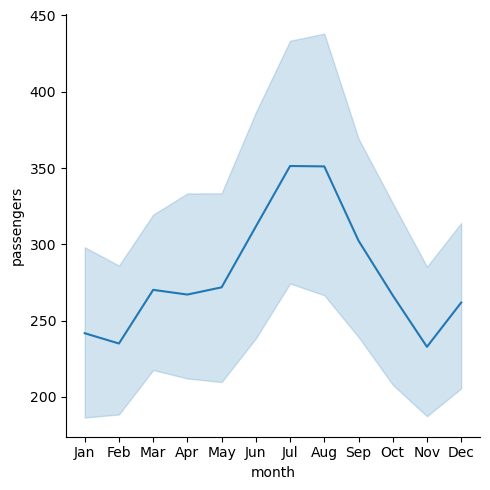

In [6]:
sns.relplot(data=flights, x='month', y='passengers', kind='line')
# Use either 'plt.show()' or add a semicolon to suppress the returned text above the plot

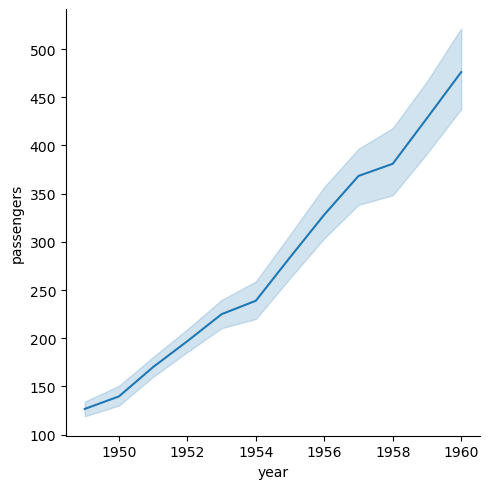

In [7]:
sns.relplot(data=flights, x='year', y='passengers', kind='line');

We can remove the Confidence Intervals by setting the parameter `errorbar=None`. In the older versions of Seaborn this was controlled by the parameter `ci`. Therefore using `ci=None` still works, but it will produce a warning that `ci` has been deprecated. 

Similarly, by setting `style="darkgrid"` in `set_theme` we indicate to set the background in the plots to a shade of dark, and to show the grid for all next plots. 

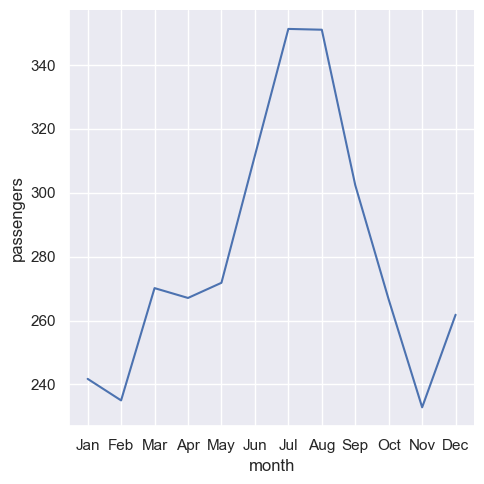

In [8]:
sns.set_theme(style="darkgrid") # show the grid for all next plots on a dark background
sns.relplot(data=flights, x='month', y='passengers', errorbar=None, kind='line');

If we set the Confidence Interval to `errorbar=sd`, the standard deviation for the x-axis values will be shown in the plot. 

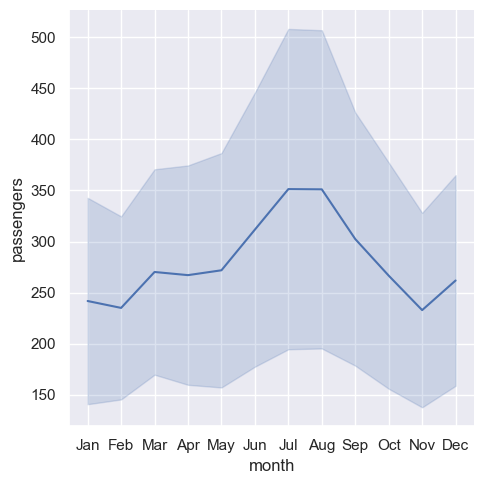

In [9]:
sns.relplot(data=flights, x='month', y='passengers', errorbar='sd', kind='line');

By default, `relplot` aggregates the values on the x-axis, and displays the average values on the y-axis (e.g., average number of passengers per month). If we would like to see all values on the y-axis instead of the average values, we can set the parameter `estimator=None`.

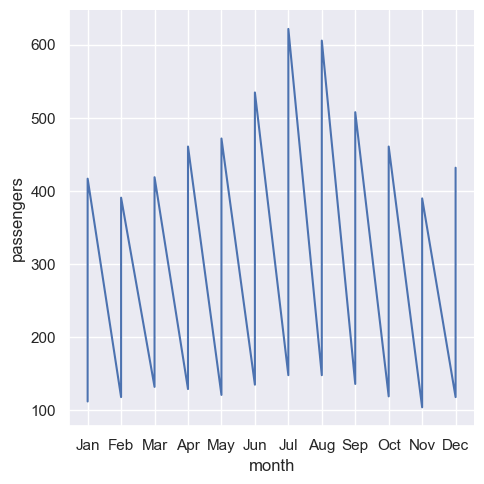

In [10]:
sns.relplot(data=flights, x='month', y='passengers', errorbar=None, estimator=None, kind='line');

We can plot multiple lines in a figure by setting the `hue` parameter to another feature in the dataset.

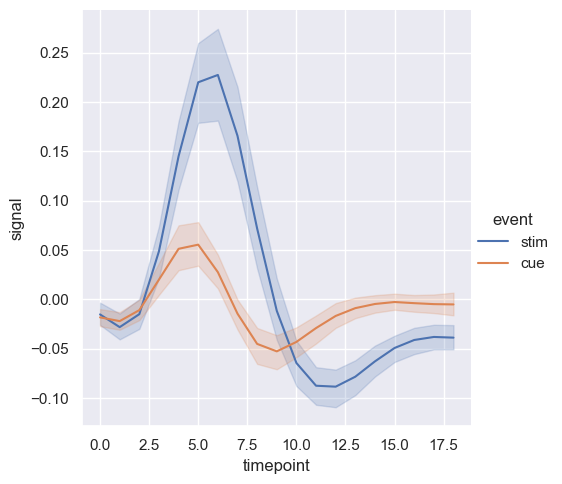

In [11]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line');

The parameter `style` allows to vary the appearance of the lines based on a specified feature (in the next cell, based on the feature `event`). Seaborn will automatically assign a different line style (e.g., dashed line) to each category in the feature `event`. In this case, there are two categories: `stim` and `cue`.

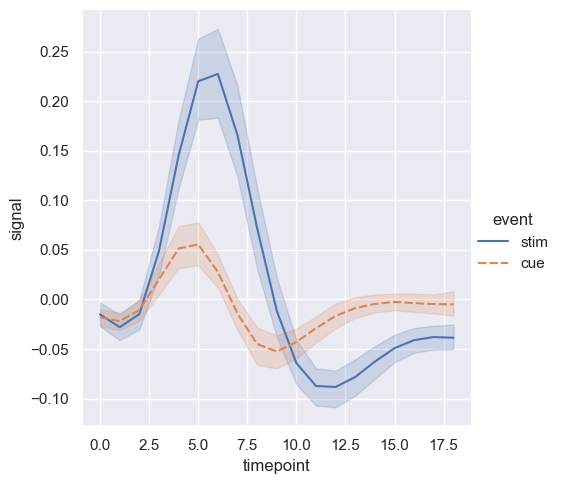

In [12]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', style='event');

To highlight the differences between the categories in `hue`, we can add marker styles as follows.

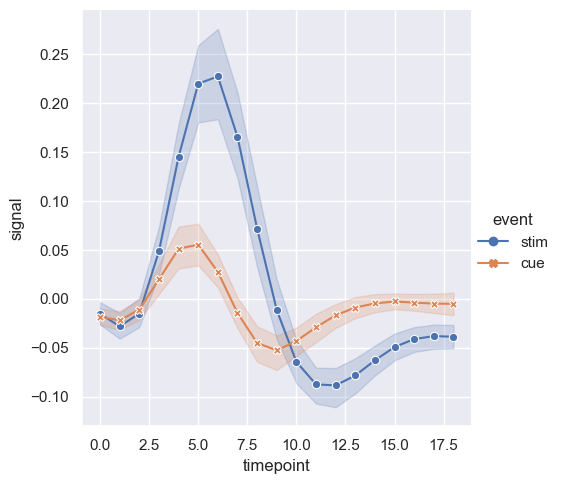

In [13]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='event', kind='line', 
            style='event', dashes=False, markers=True);

And, we can plot multiple relationships by introducing a parameter `col` to create multiple columns, or we can also introduce multiple rows with the `row` parameter, as in the following cell below.

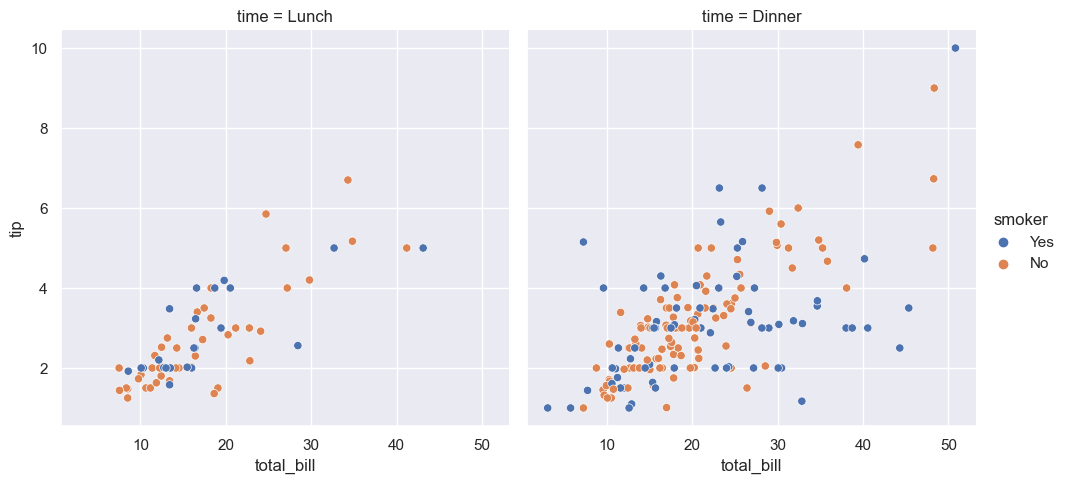

In [14]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time');

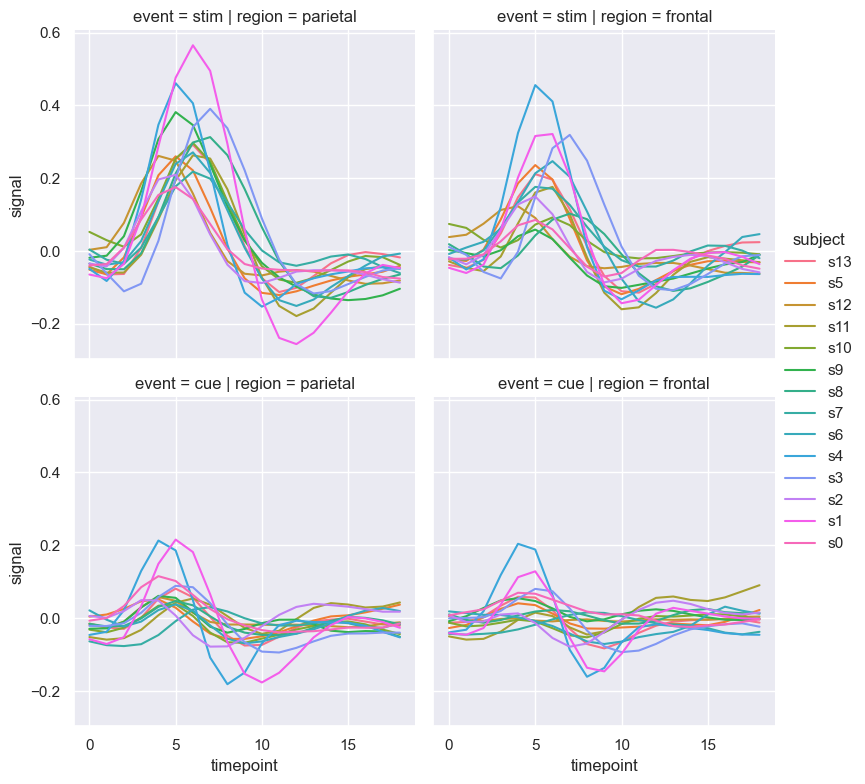

In [15]:
sns.relplot(data=fmri, x='timepoint', y='signal', hue='subject',
           col='region', row='event', height=4, kind='line', estimator=None);

### Scatter Plots

We can create scatter plots in Seaborn by using either `sns.scatterplot()` or `sns.relplot()`.

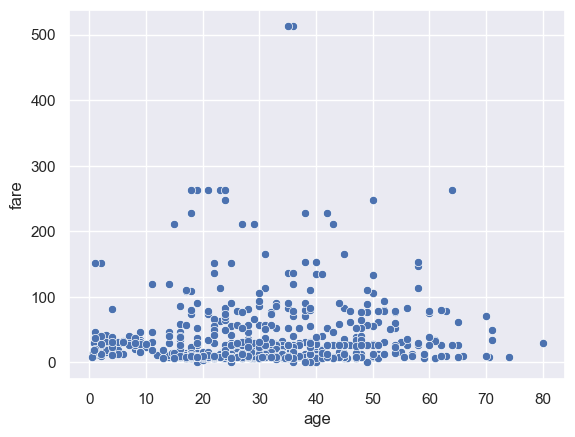

In [16]:
sns.scatterplot(data=titanic, x='age', y='fare');

Similar to the line plots, the `hue` parameter maps another feature to the plot. 

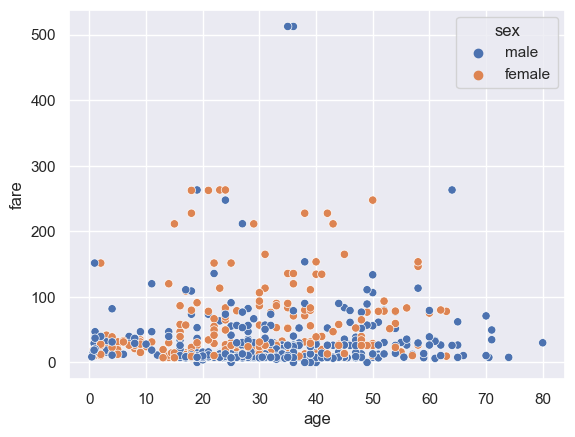

In [17]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex');

To highlight the difference between the categories in `hue`, we can add different marker styles with `style='sex'`.

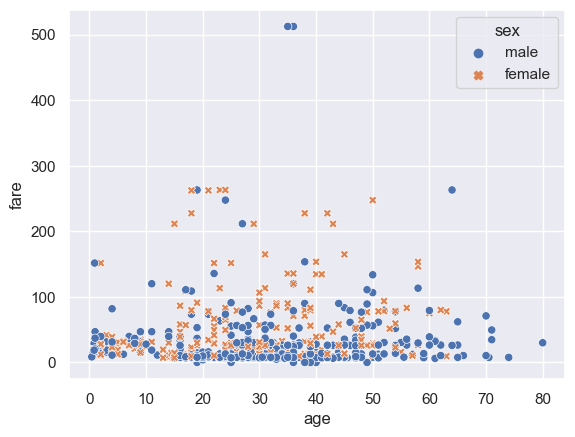

In [18]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='sex');

Recall that the default size of figures in Matplotlib is 6.4 by 4.8 inches. The same applies to Seaborn, and similar to Matplblib, to specify the figure size, we can use `figure(figsize=())`. 

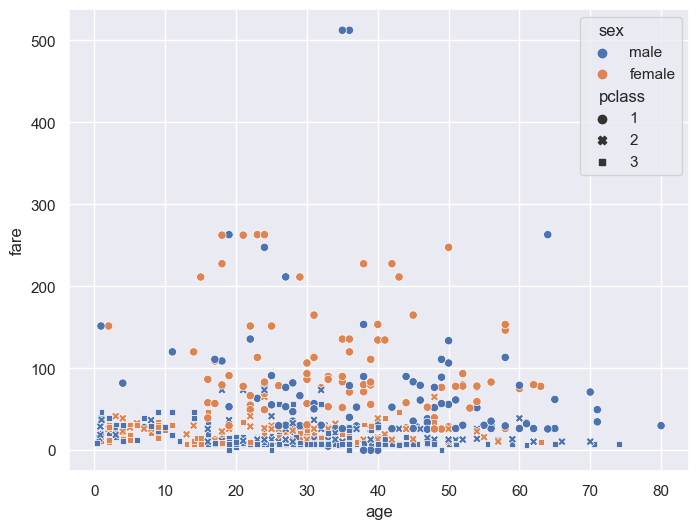

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass');

We can also define the type of markers to use with the parameter `markers`. 

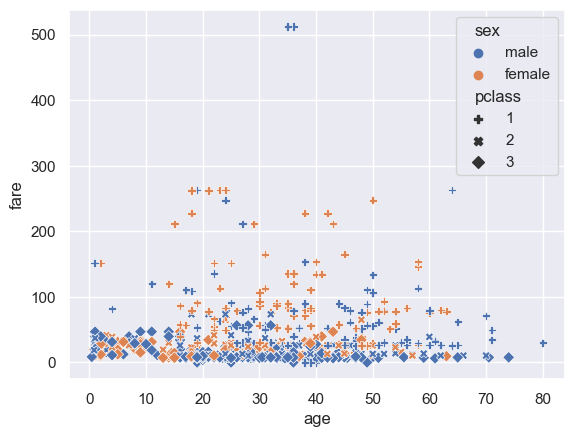

In [20]:
marker_types = {1:'P', 2:'X', 3:'D'} # P(plus), X (cross), and D (diamond) markers
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex', style='pclass', markers=marker_types);

Adding the parameter `sizes` can make the plot more meaningful, as Seaborn will use `sizes` to control the size of the markers in the plot.

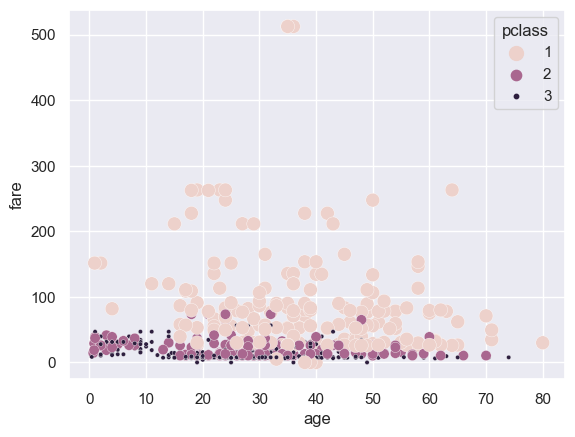

In [21]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='pclass', size='pclass', sizes=(100,10));

## 12.2 Distribution Plots <a id="12.2-distribution-plots"/>

**Distribution plots** visualize the distribution of data features, and can help understand the range of values, their central tendency, potential skewness in the data, presence of outliers, and other data characteristics. 

Distribution plot functions in Seaborn include:

- `displot()`
- `histplot()`
- `jointplot()`
- `pairplot()`
- `rugplot()`
- `kdeplot`

### Plotting Histograms with `displot()` and `histplot()`

Histograms can be plotted with the `displot()` function.

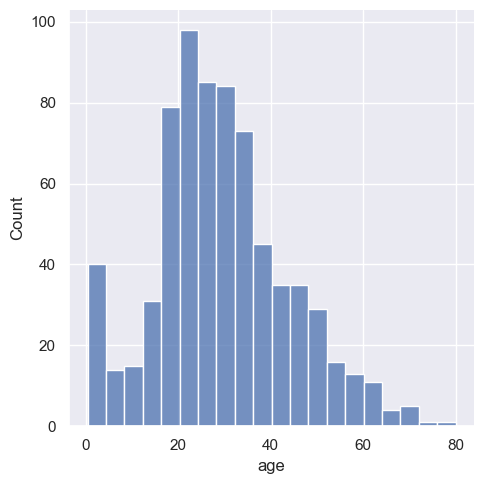

In [22]:
sns.displot(titanic['age']);

We can set the number of `bins` in histograms to a value of choice. Similarly, if we set the parameter `kde` which stands for Kernel Density Estimator (KDE)  to True, a KDE plot will be overlaid on top of the histogram. KDE is a smoothed curve representation of the probability density function of the data. It uses a Gaussian kernel to smooth the data distribution. 

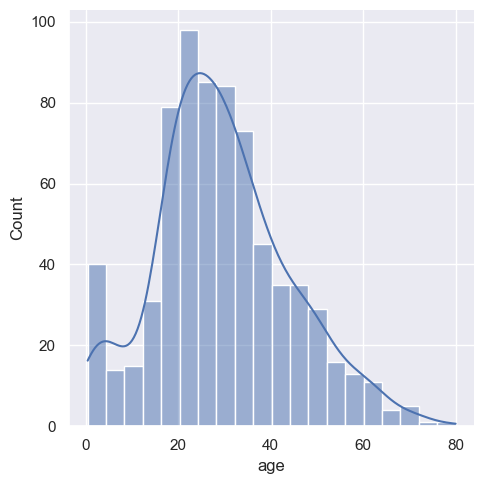

In [23]:
sns.displot(titanic['age'], kde=True, bins=20);

We can also plot categorical data with histograms, in which case the histograms become bar plots. The parameter `shrink` has a value between 0 and 1 and controls the width of the bars in the plot. Compare the following two cells. 

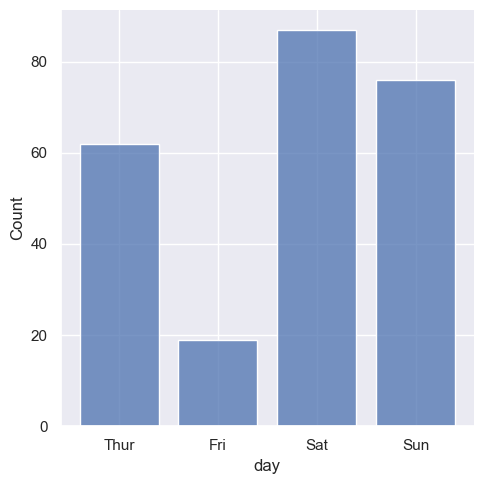

In [24]:
sns.displot(tips, x='day', shrink=0.8);

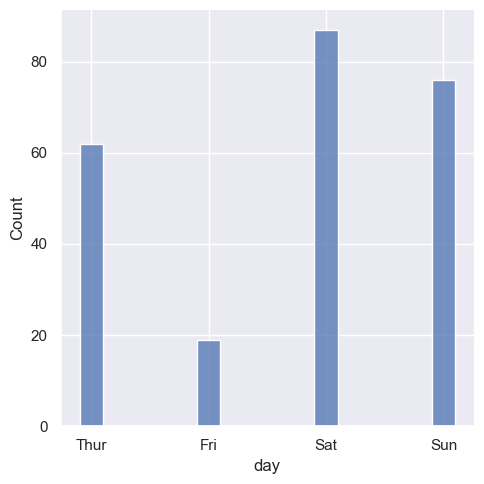

In [25]:
sns.displot(tips, x='day', shrink=0.2);

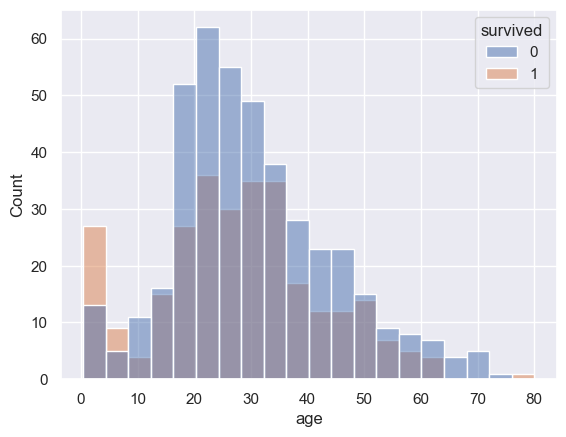

In [26]:
sns.histplot(titanic, x="age", hue="survived");

We can stack histograms of multiple features by setting the parameter `multiple='stack'`.

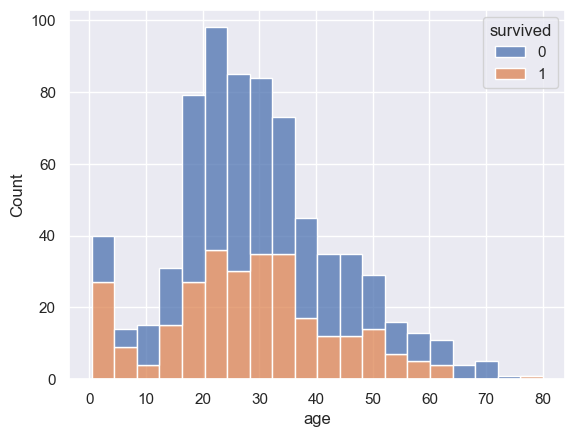

In [27]:
sns.histplot(titanic, x='age', hue='survived', multiple='stack');

### Plotting Bivariate Data with `jointplot()`

We can use `jointplot()` to plot two variables with bivariate and univariate graphs.

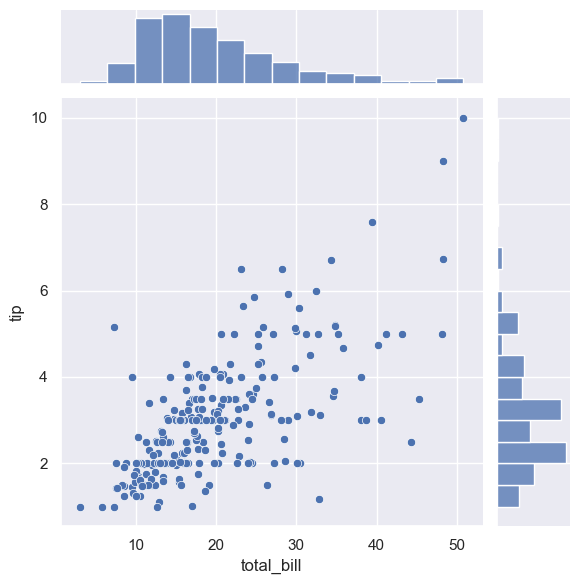

In [28]:
sns.jointplot(data=tips, x='total_bill', y='tip');

The following options for the parameter `kind` are available: `scatter, reg, resid, kde, hex`. The default `kind` is `scatter`.

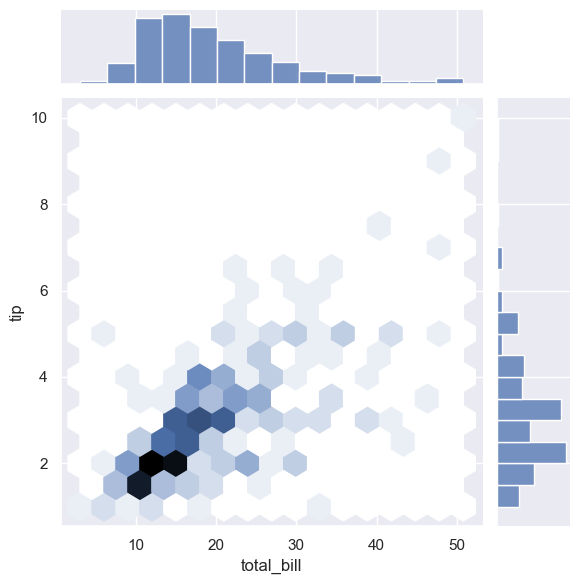

In [29]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex');

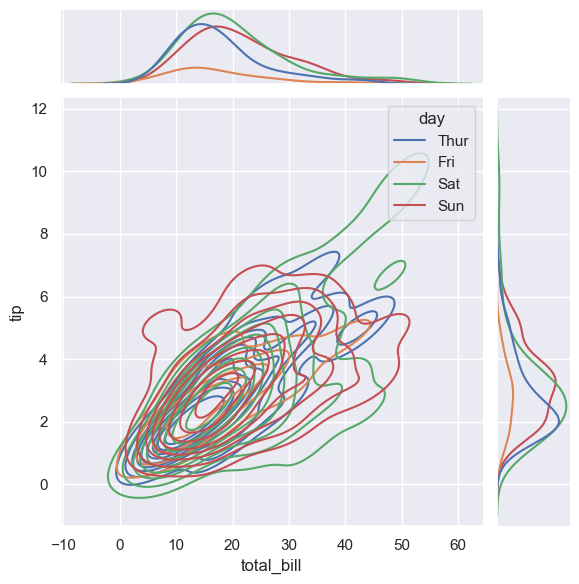

In [30]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', hue='day');

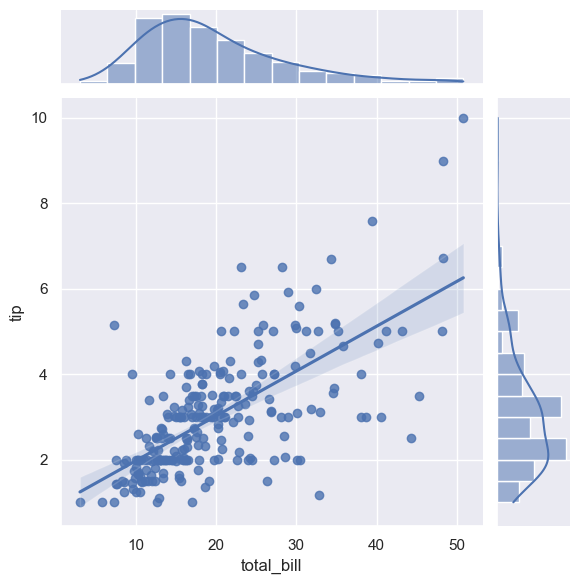

In [31]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg');

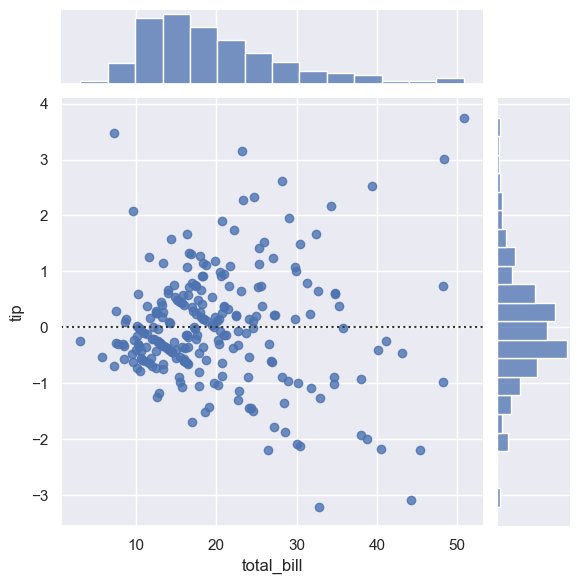

In [32]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='resid');

### Plotting Multiple Distributions with `pairplot()`

The function `pairplot()` visualizes all possible distributions of variables in datasets. It allows to immediately notice relationships between features.

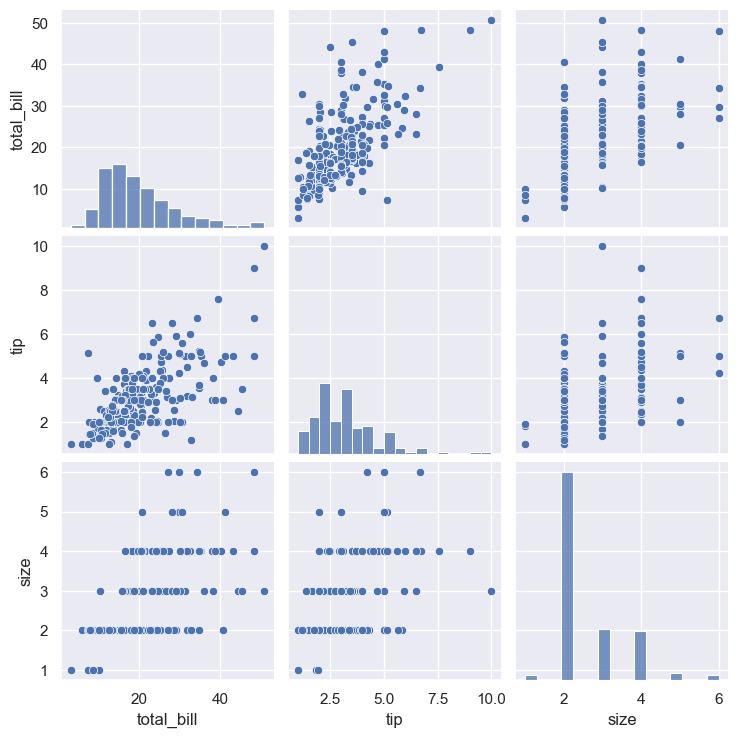

In [33]:
sns.pairplot(tips);

### Plotting Distributions with `rugplot()`

The function `rugplot()` visualizes marginal distributions by drawing ticks or dashes along the x-axis and y-axis of the univariate variable.

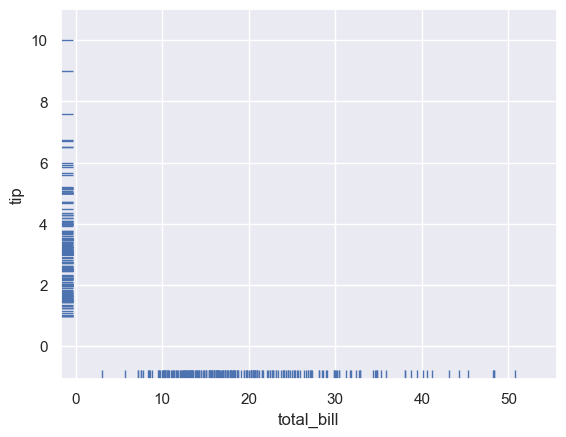

In [34]:
sns.rugplot(data=tips, x='total_bill', y='tip');

Similarly, we can combine `relplot()` and `rugplot()` in one figure.

<Axes: xlabel='total_bill', ylabel='tip'>

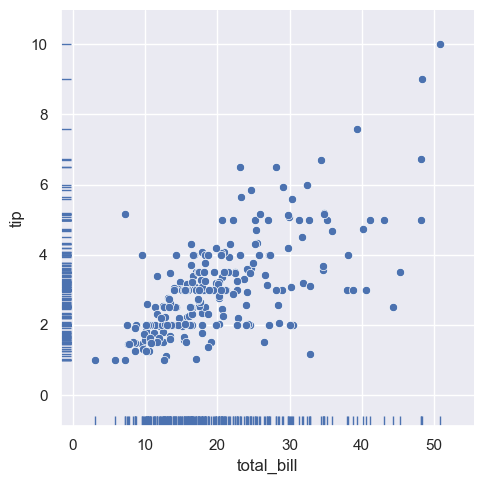

In [35]:
sns.relplot(data=tips, x='total_bill', y='tip')
sns.rugplot(data=tips, x='total_bill', y='tip')

### Kernel Density Estimation (KDE) Plot with `kdeplot()`

Besides using the `kde` parameter with `displot()`, Seaborn also provides the function `kdeplot()` to visualize the smoothed curve of the probability density function of a variable. 

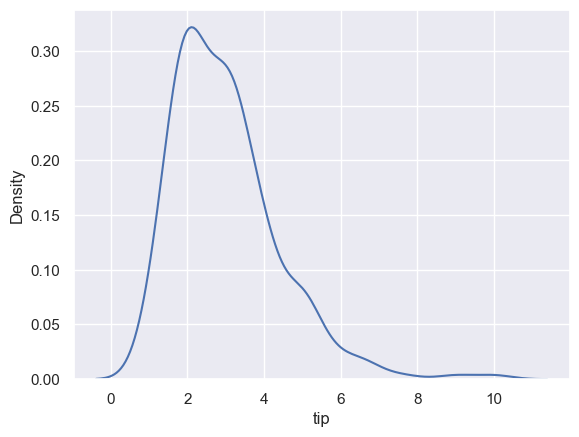

In [36]:
sns.kdeplot(data=tips, x='tip');

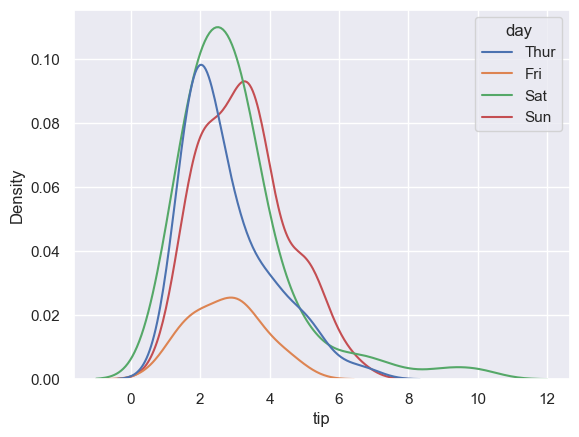

In [37]:
sns.kdeplot(data=tips, x='tip', hue='day');

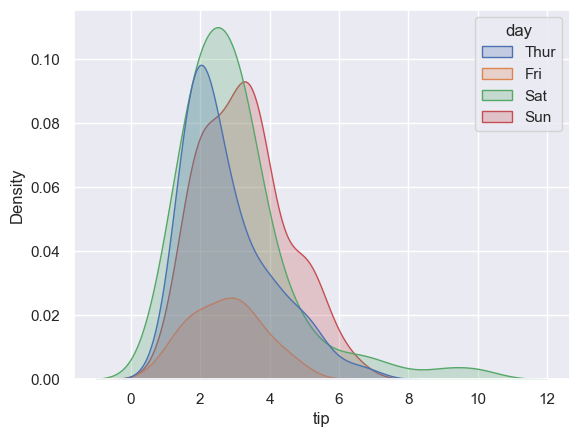

In [38]:
sns.kdeplot(data=tips, x='tip', hue='day', fill=True);

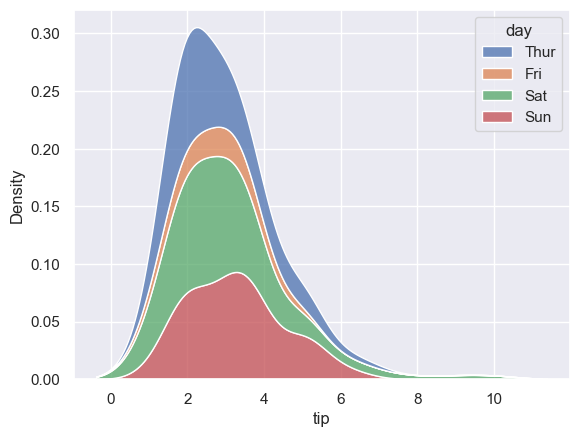

In [39]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

### Cumulative Distributions

By setting the parameter `kind` to `ecdf` in `displot()`, we can plot the cumulative distribution of a univariate variable, where `ecdf` stands for `empirical cumulative distribution function`.

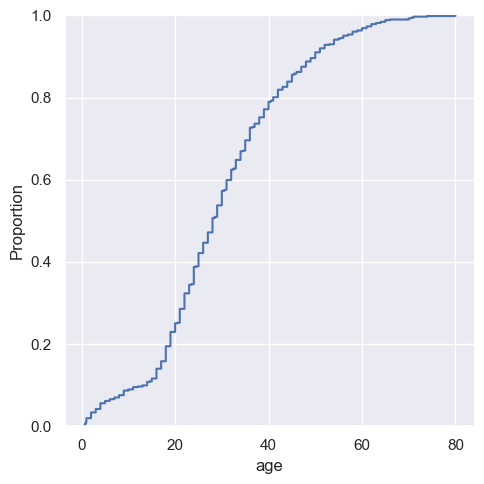

In [40]:
sns.displot(titanic, x='age', kind='ecdf');

## 12.3 Categorical Plots <a id="12.3-categorical-plots"/>

In Seaborn, there are various plot functions for visualizing categorical data. These include:

1. Categorical estimate plots

- barplot()
- countplot()
- pointplot()

2. Categorical distribution plots

- boxplot()
- boxenplot()
- violinplot()

3. Categorical scatter plots
- stripplot()
- swarmplot()

Similar to distribution plots, Seaborn also provides a high-level function `catplot()` for plotting all of the above types, by passing different values for the `kind` parameter. The available settings include: `bar, count, point, box, boxen, violin, strip, swarm`. 

### Categorical Estimate Plots

The function `barplot` is used to visualize the aggregated categorical data based on different estimation functions (the default is mean). To create barplots in Seaborn, we can either use `barplot()` or `catplot(..., kind='bar')`.

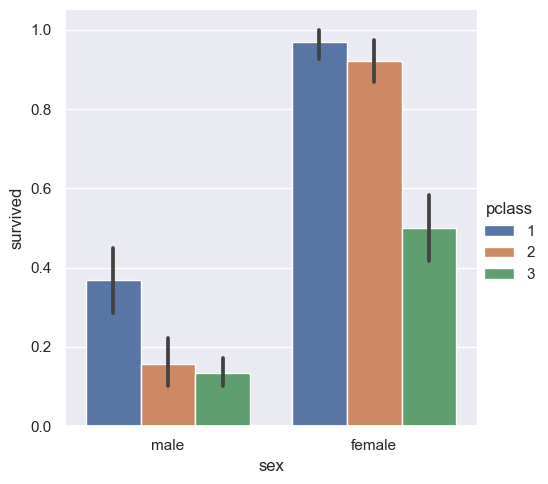

In [41]:
sns.catplot(data=titanic, x='sex', y='survived', hue='pclass', kind='bar');

The function `countplot` is used to visualize the number of observations in each category. 

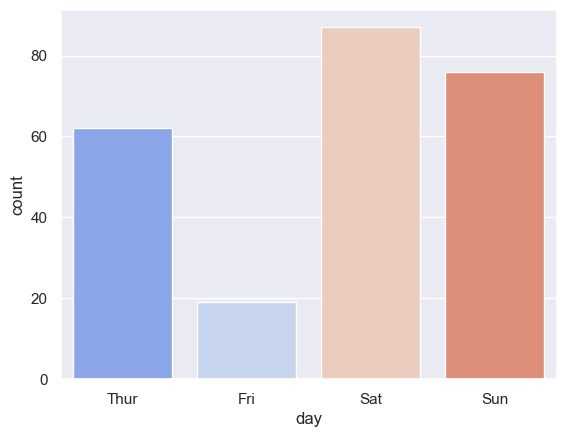

In [42]:
sns.countplot(data=tips, x='day', palette='coolwarm');

# The same plot can be obtained with
#sns.catplot(data=tips, x='day', kind='count', palette='coolwarm')

Rather than plotting bars, the function `pointplot()` visualizes the point estimation of categorical data. Notice that it can also connect the points with the categorical variable specified at `hue`.

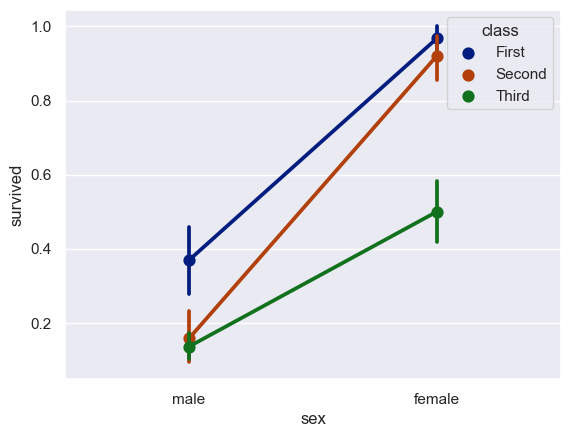

In [43]:
sns.pointplot(data=titanic, x='sex', y='survived', hue='class', palette='dark');

### Categorical Distribution Plots

The functions `boxplot()`, `boxenplot()`, and `violinplot()` are used to plot the distributions of categorical data. 

A box plot (or box-and-whisker plot) shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution. Exceptions are data points that are determined to be outliers, by using a method that is a function of the inter-quartile range.

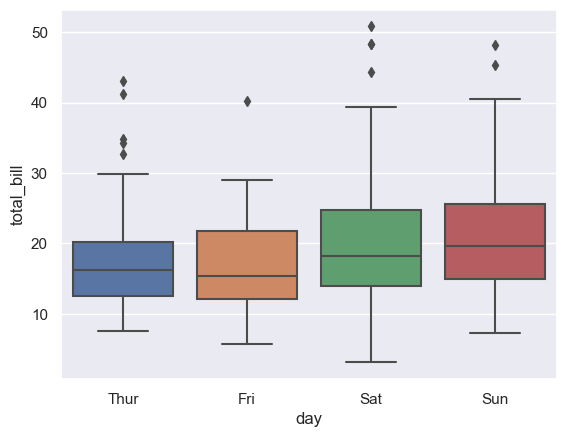

In [44]:
sns.boxplot(data=tips, x='day', y='total_bill');

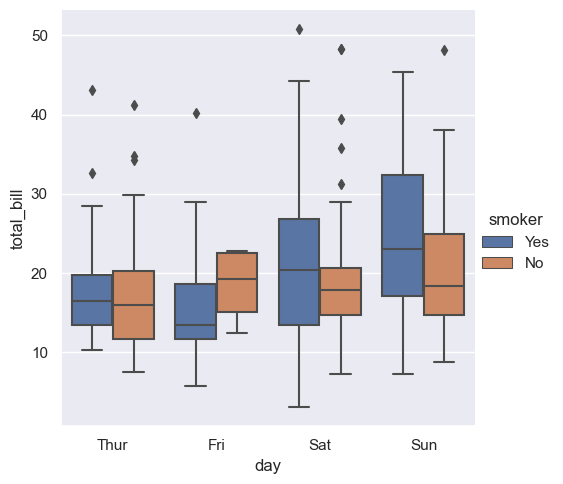

In [45]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='box');

The `kind` parameter set to `boxenplot` creates boxen plots, which are an enhanced version of box plots. Boxen plots employ additional steps for calculating the quartiles, and are more efficient in visualizing features that have many outliers. 

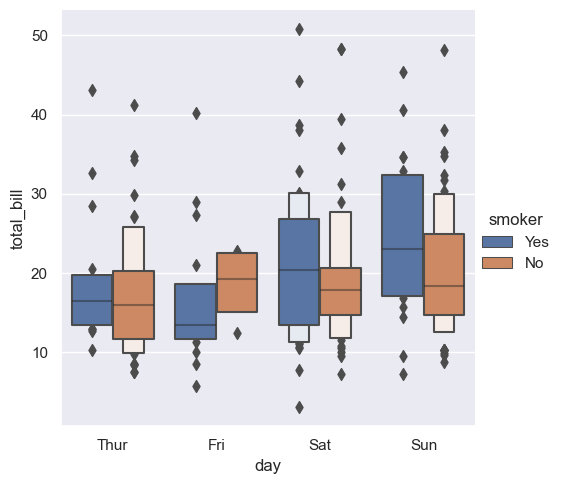

In [46]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', kind='boxen');

The function `violinplot()` shows the entire distribution of categorical data and uses a rotated kernel density plot on both the right and left side of box plots. Understandably, the plots resemble violins, and they make it easier to visualize the distribution's shape, skewness, and presence of multiple peaks. Unlike box plots and boxen plots, violin plots do not display the individual outliers in the data. 

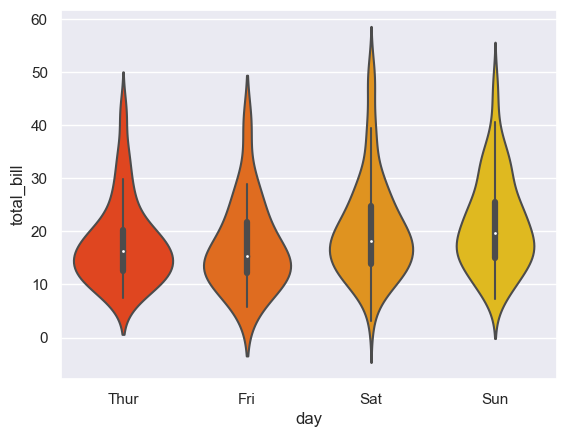

In [47]:
sns.violinplot(data=tips, x='day', y='total_bill', palette='autumn');

The `split` parameter saves space when the `hue` feature has two levels.

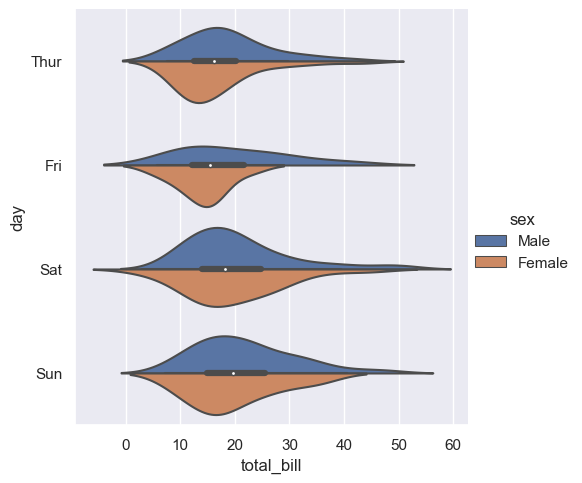

In [48]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='violin', split=True);

### Categorical Scatter Plots

The functions `stripplot()` and `swarmplot()` visualize categorical data with scatter plots.

In a `stripplot()` the data points are shown in a strip, whereas in a `swarmplot()` the data are randomly shifted horizontally to avoid overlaps. Strip plots are simpler and can be used to see the exact positions of data points, and swarm plots resemble a swarm of bees and they make it easier to see the distribution of the data points. 

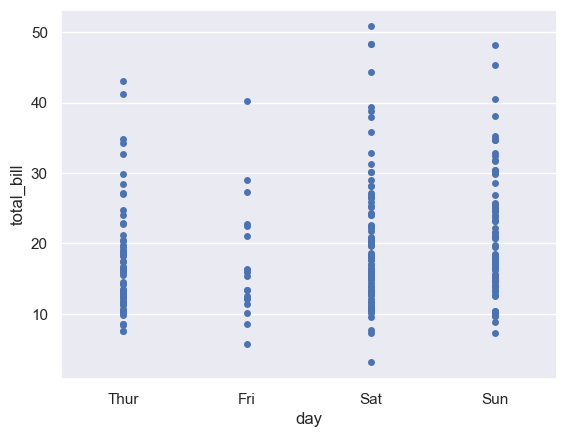

In [49]:
sns.stripplot(data=tips, x='day', y='total_bill', jitter=False);

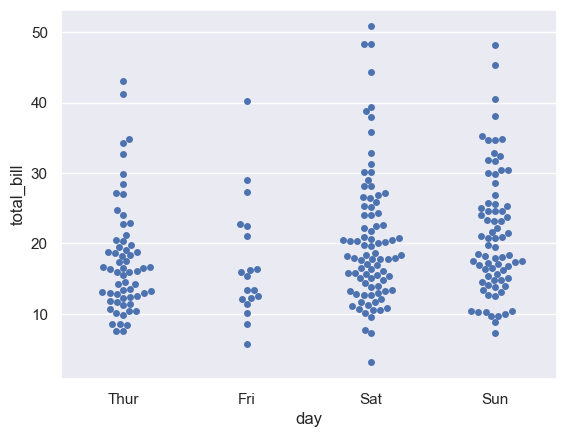

In [50]:
sns.swarmplot(data=tips, x='day', y='total_bill');

Also, when using `catplot()`, the parameter `strip` is the default value of the `kind` parameter. 

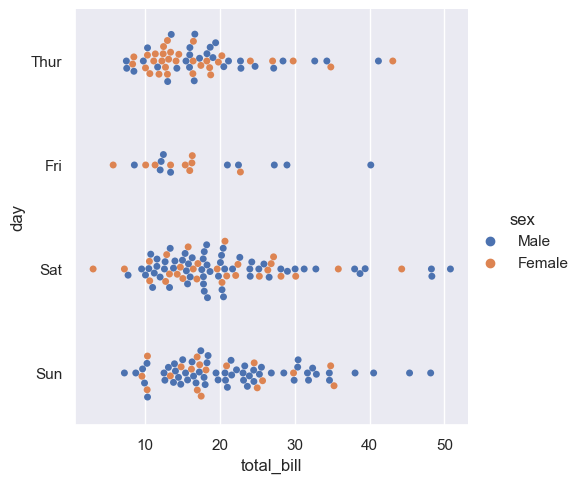

In [51]:
sns.catplot(data=tips, x='total_bill', y='day', hue='sex', kind='swarm');

### Plotting Multiple Categorical Plots

We can plot multiple plots with `catplot()` by setting the parameter `col` to a data feature.

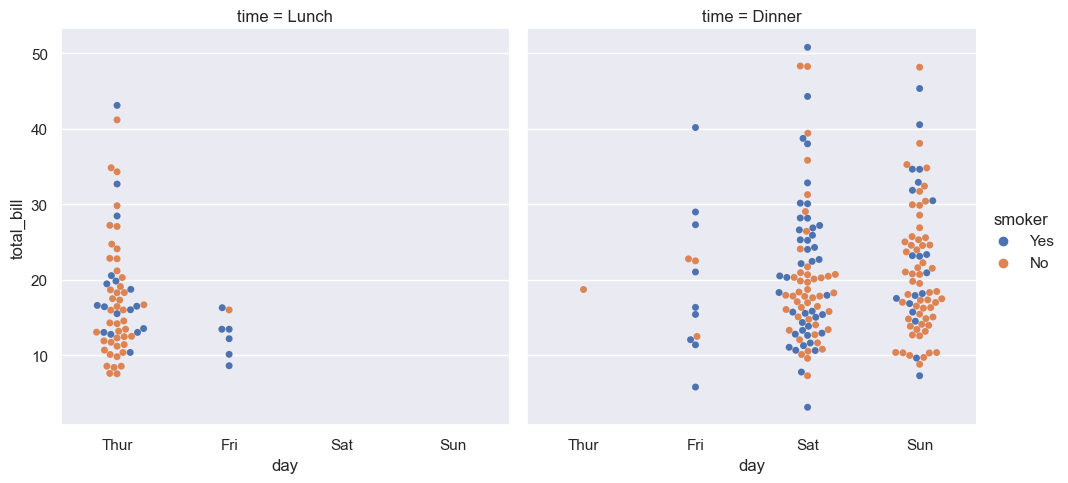

In [52]:
sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', col='time', kind='swarm');

## 12.4 Regression Plots <a id="12.4-regression-plots"/>

Seaborn provides plots for visualizing the linear relationship between the features (i.e., linear model). The function `lmplot()` can be used for this purpose, where `lm` stands for linear model. 

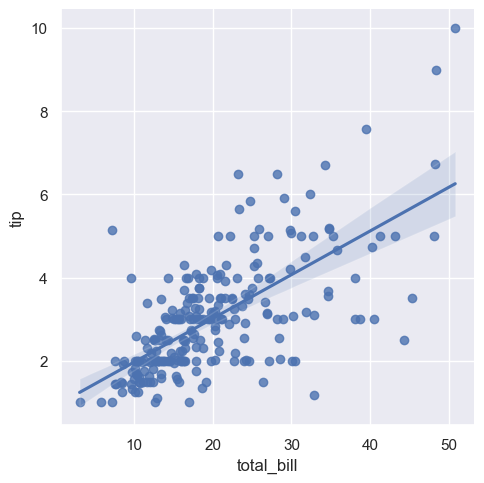

In [53]:
sns.lmplot(data=tips, x='total_bill', y='tip');

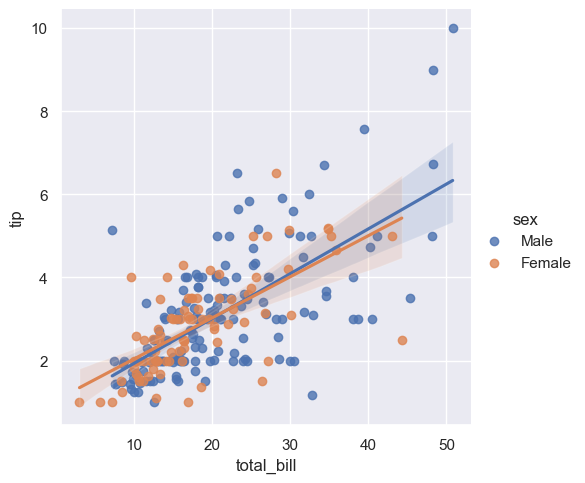

In [54]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='sex');

In [55]:
tips['big_tip'] = (tips.tip / tips.total_bill) >.15
tips.head()

total_bill   tip     sex smoker  day    time  size  big_tip
0       16.99  1.01  Female     No  Sun  Dinner     2    False
1       10.34  1.66    Male     No  Sun  Dinner     3     True
2       21.01  3.50    Male     No  Sun  Dinner     3     True
3       23.68  3.31    Male     No  Sun  Dinner     2    False
4       24.59  3.61  Female     No  Sun  Dinner     4    False

If we have one binary variable, we can also do logistic regression. 

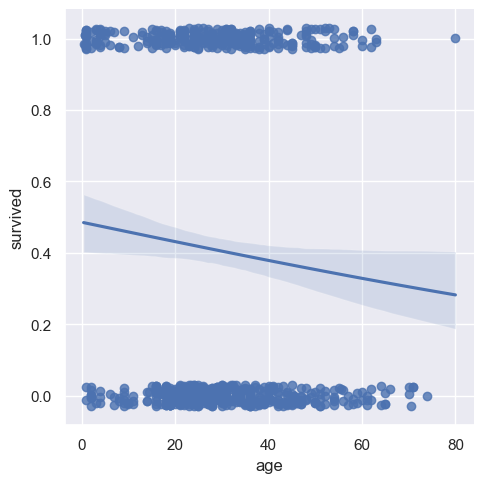

In [56]:
sns.lmplot(data=titanic, x='age', y='survived', logistic=True, y_jitter=0.03);

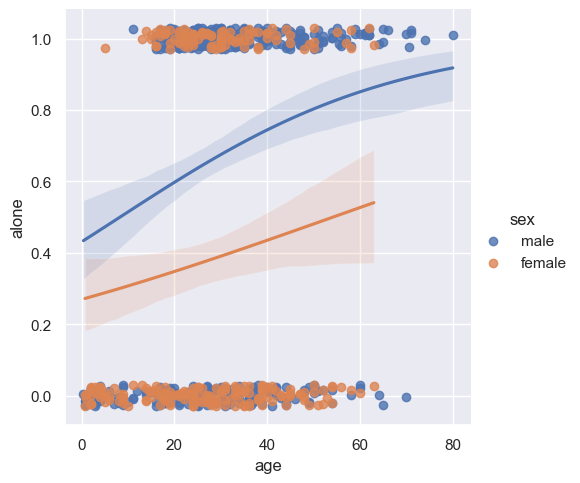

In [57]:
sns.lmplot(x='age', y='alone', data=titanic, logistic=True, y_jitter=0.03, hue='sex');

We can also use markers to make the plot more clear.

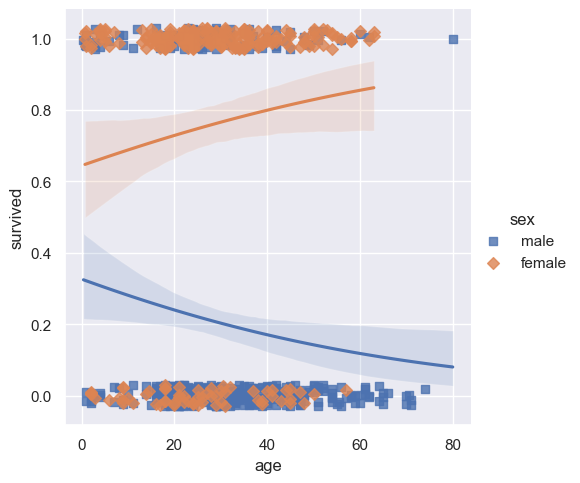

In [58]:
sns.lmplot(x='age', y='survived', data=titanic, hue='sex', logistic=True, 
           y_jitter=0.03, markers=['s','D']);

### Multiple Regression Plots

As we explained in the above sections, we can create subplots by setting the parameters `col` and `row` to specific data features.

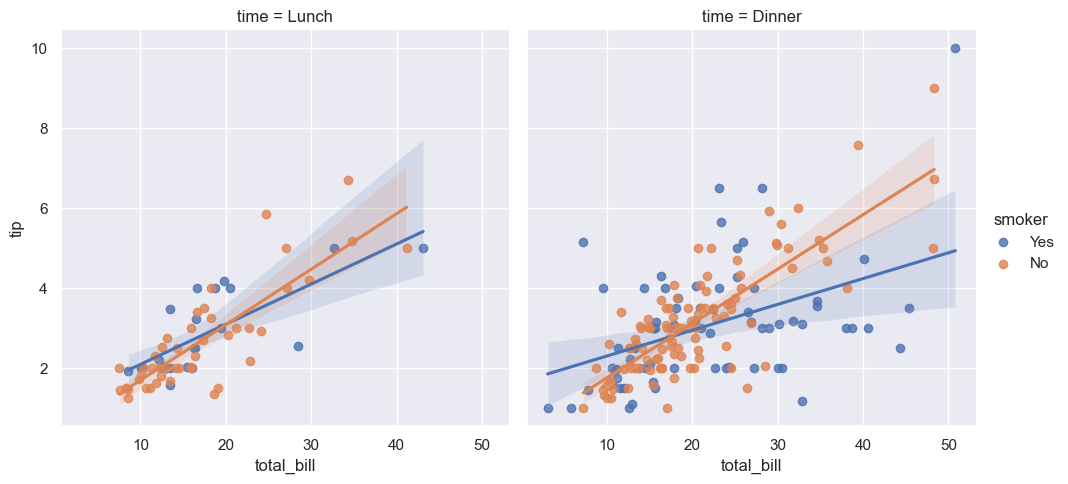

In [59]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time');

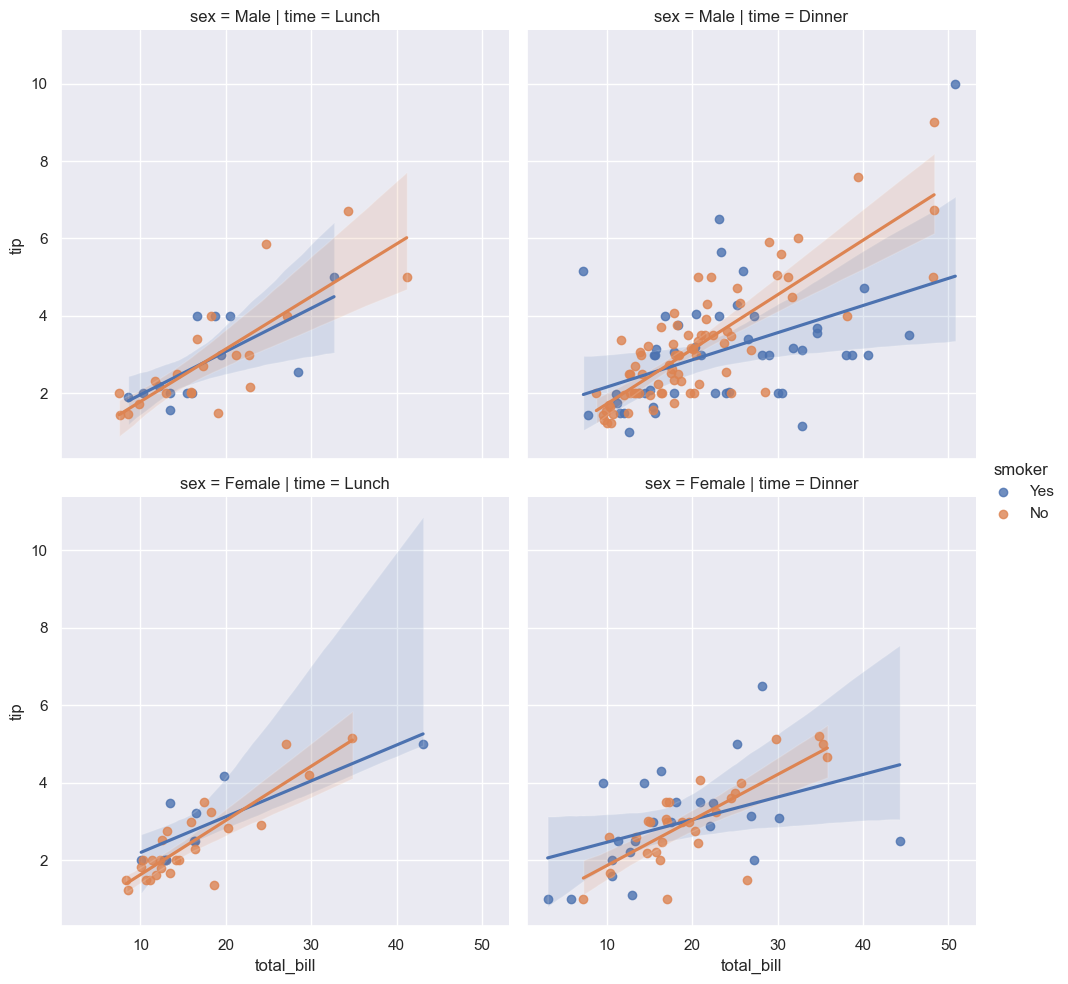

In [60]:
sns.lmplot(data=tips, x='total_bill', y='tip', hue='smoker', col='time', row='sex');

We can also use `jointplot()` and `pairplot()` to create regression plots in Seaborn by setting the parameter `kind` to `reg`.

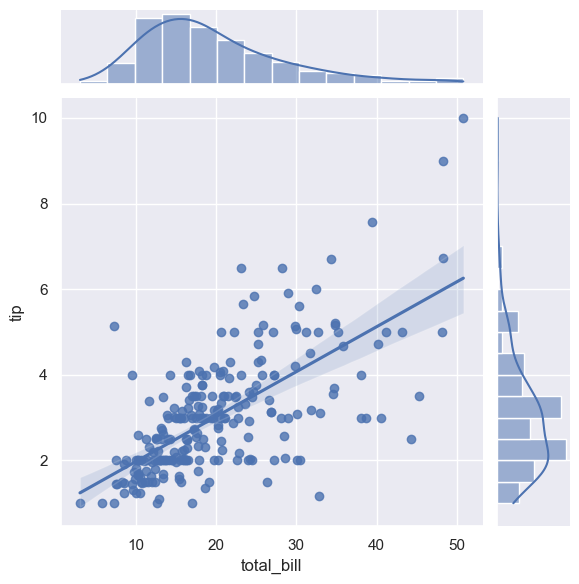

In [61]:
sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg');

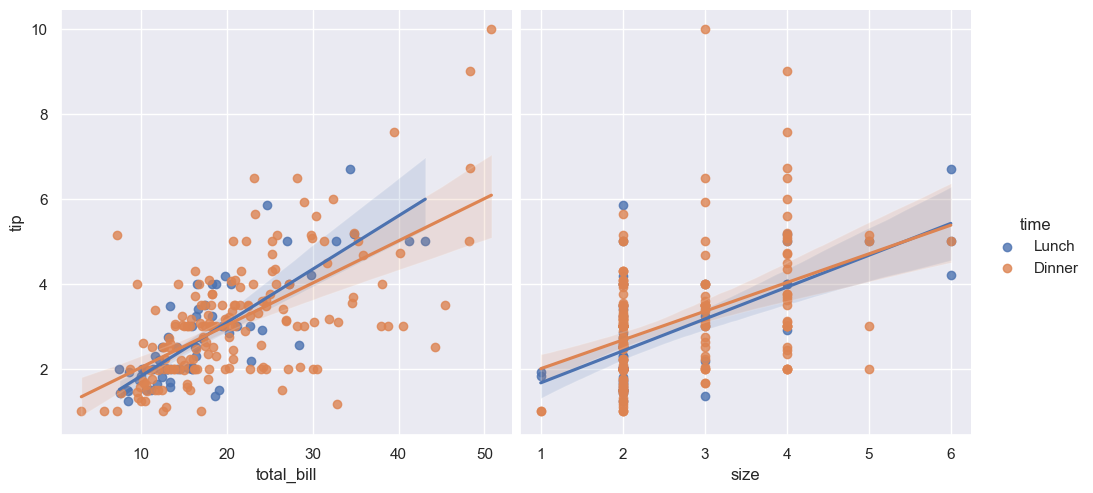

In [62]:
sns.pairplot(tips, x_vars=['total_bill', 'size'], y_vars=['tip'],
             hue='time', kind='reg', height=5);

## 12.5 Multiple Plots <a id="12.5-multiple-plots"/>

Multiple plot functions in Seaborn are used to visualize multiple features along different axes. Seaborn provides the following functions:

- FacetGrid
- PairGrid
- PairPlot

### `FacetGrid()`

The function `FacetGrid()` creates multiple grid plots and allows plotting the features on row and column axes. We can also use the `hue` parameter to visualize an individual feature. 

What's interesting about FacetGrid is that you can choose whether you plot on row axis, column axis, or both. 

After we create the grid with `FacetGrid()`, to add visualizations we will need to map it to a given plot type (such as scatter, histogram, barplot, etc). 

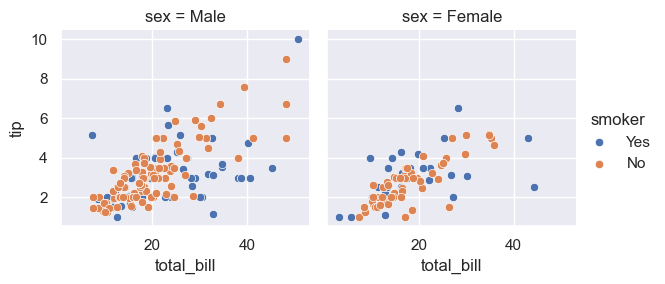

In [63]:
plot = sns.FacetGrid(tips, col='sex', hue='smoker')
plot.map(sns.scatterplot,'total_bill', 'tip')
plot.add_legend();

C:\Users\vakanski\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


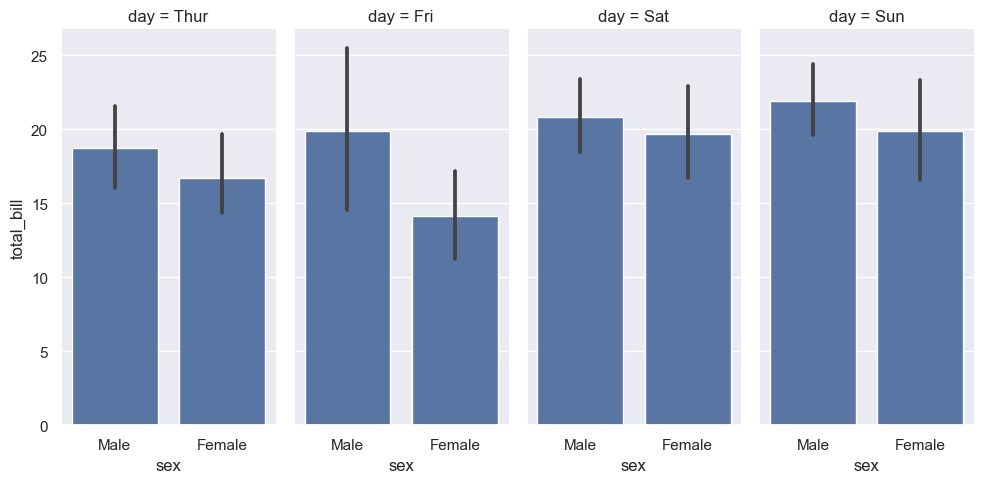

In [64]:
plot = sns.FacetGrid(tips, col='day', height=5, aspect=0.5)
plot.map(sns.barplot, 'sex', 'total_bill');

### `PairGrid()`

We can use `PairGrid()` to plot the pairwise relationship between the features in the dataset. 

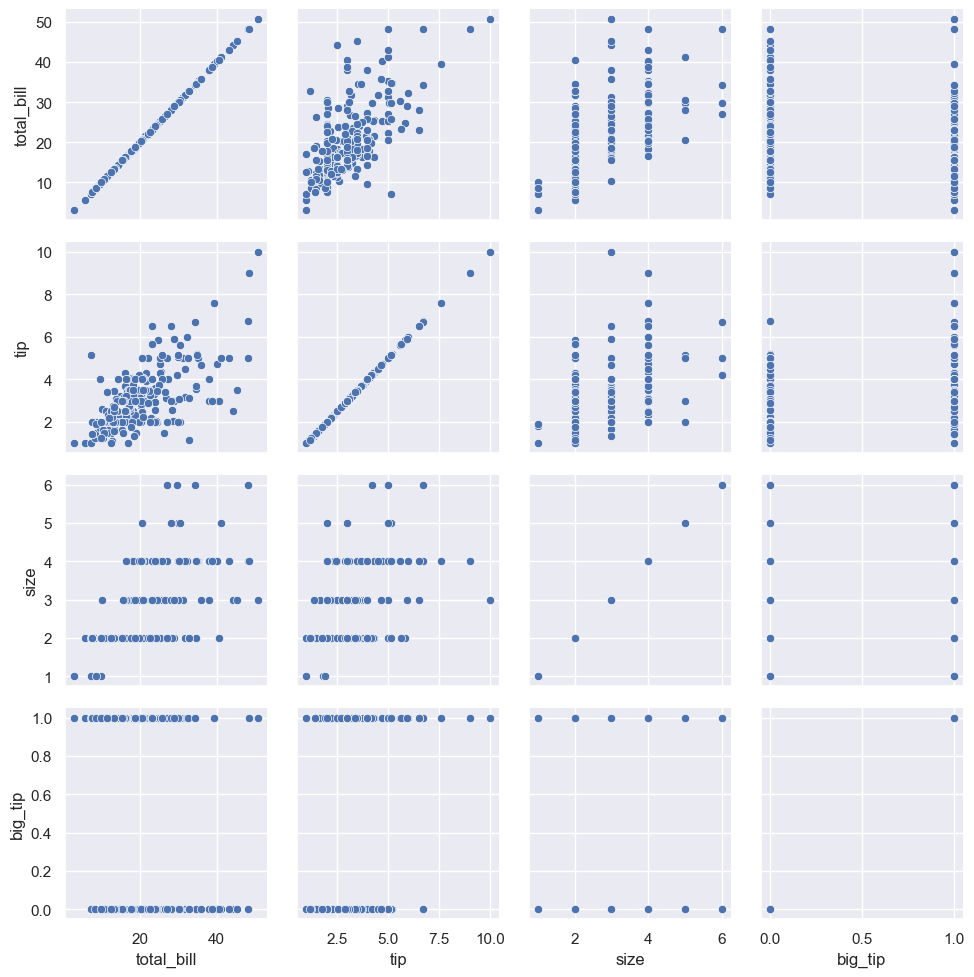

In [65]:
plot = sns.PairGrid(tips)
plot.map(sns.scatterplot);

It is also possible to be selective on the plot type we want at the diagonals. 

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


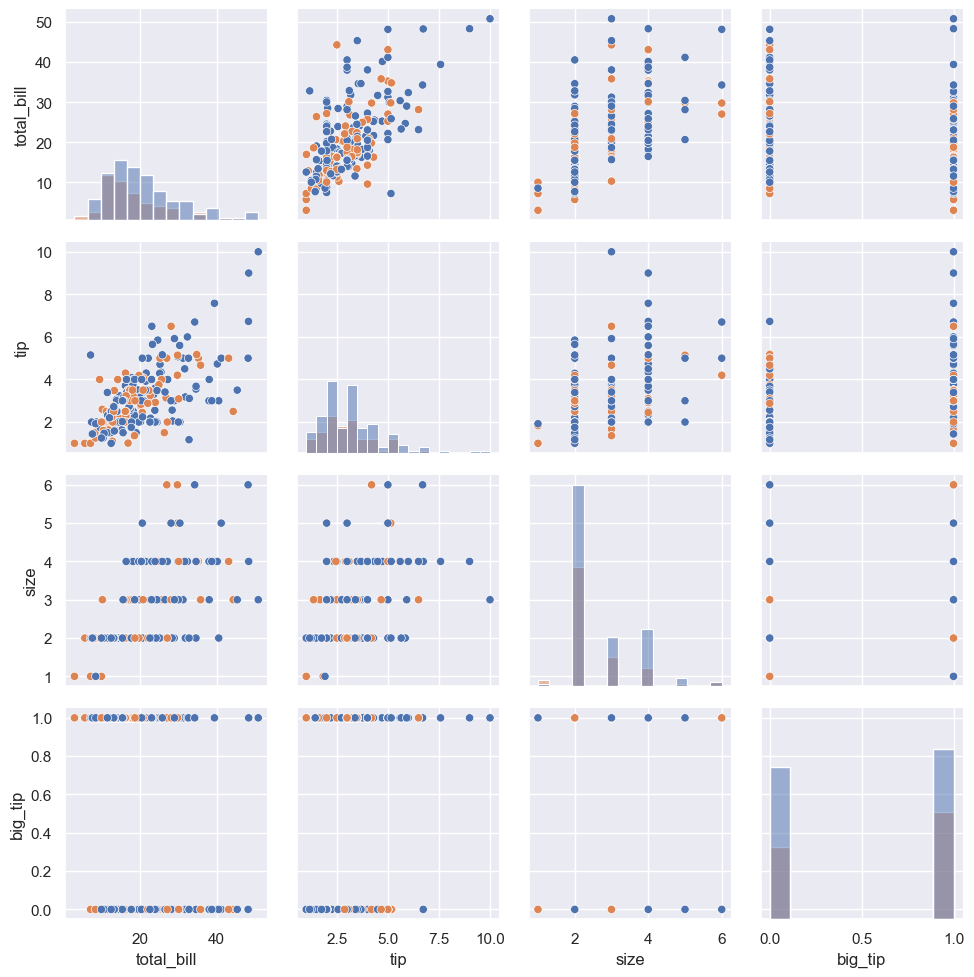

In [66]:
plot = sns.PairGrid(tips, hue='sex')
plot.map_diag(sns.histplot)
plot.map_offdiag(sns.scatterplot)
plot.add_legend;

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


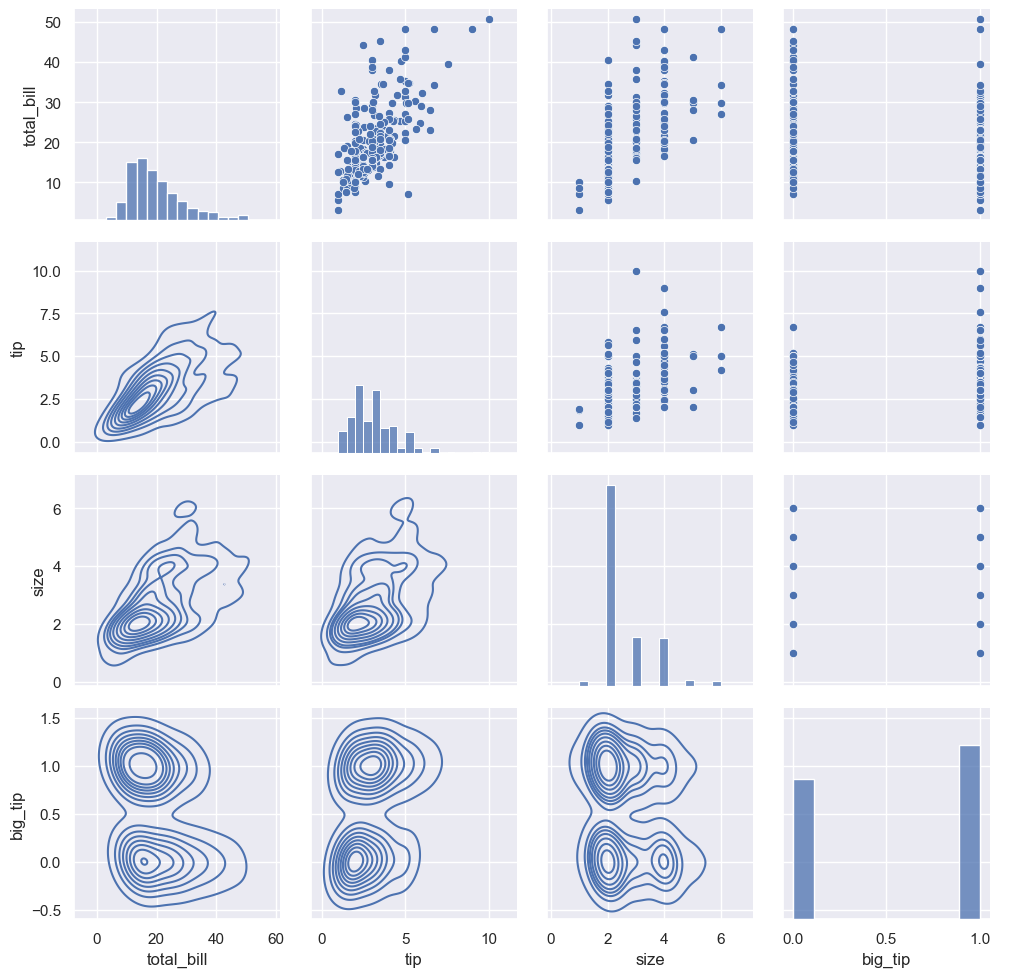

In [67]:
plot = sns.PairGrid(tips)
plot.map_diag(sns.histplot)
plot.map_upper(sns.scatterplot)
plot.map_lower(sns.kdeplot)
plot.add_legend();

Also, there is an option to select the features we are interested in, instead of plotting all features.

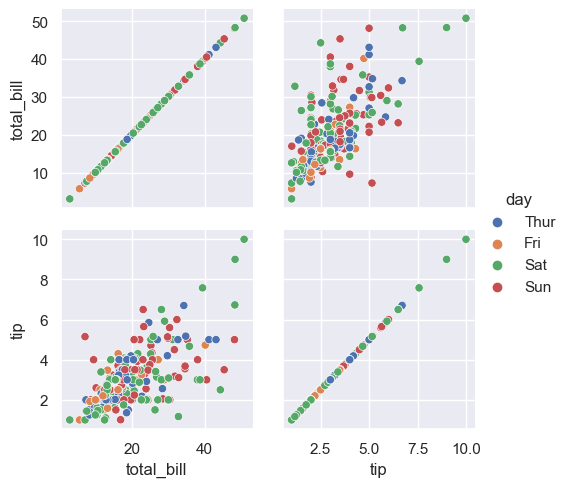

In [68]:
plot = sns.PairGrid(tips, vars=['total_bill', 'tip'], hue='day')
plot.map(sns.scatterplot)
plot.add_legend();

### `Pairplot()`

The function `pairplot()` is a simple, flexible, and quick way to visualize the entire dataset, which allows to quickly understand the relationships between different features. 

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


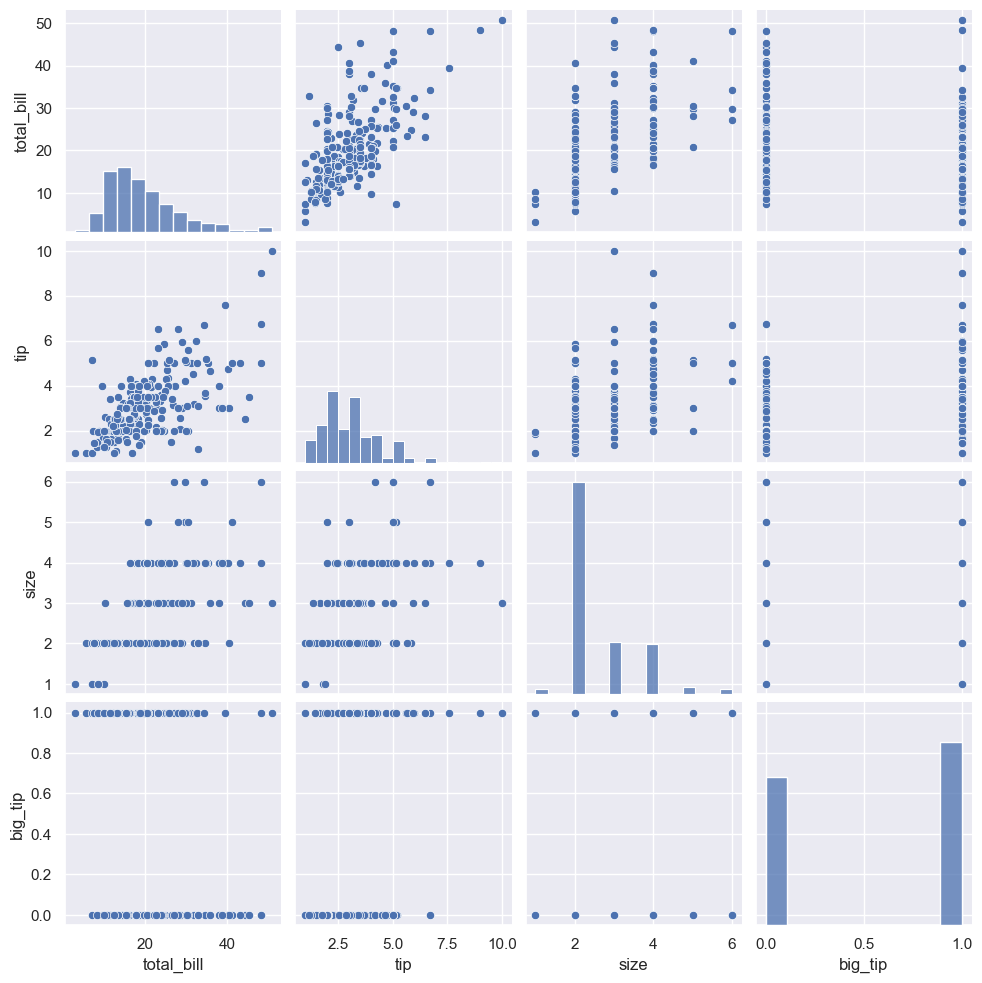

In [69]:
sns.pairplot(tips);

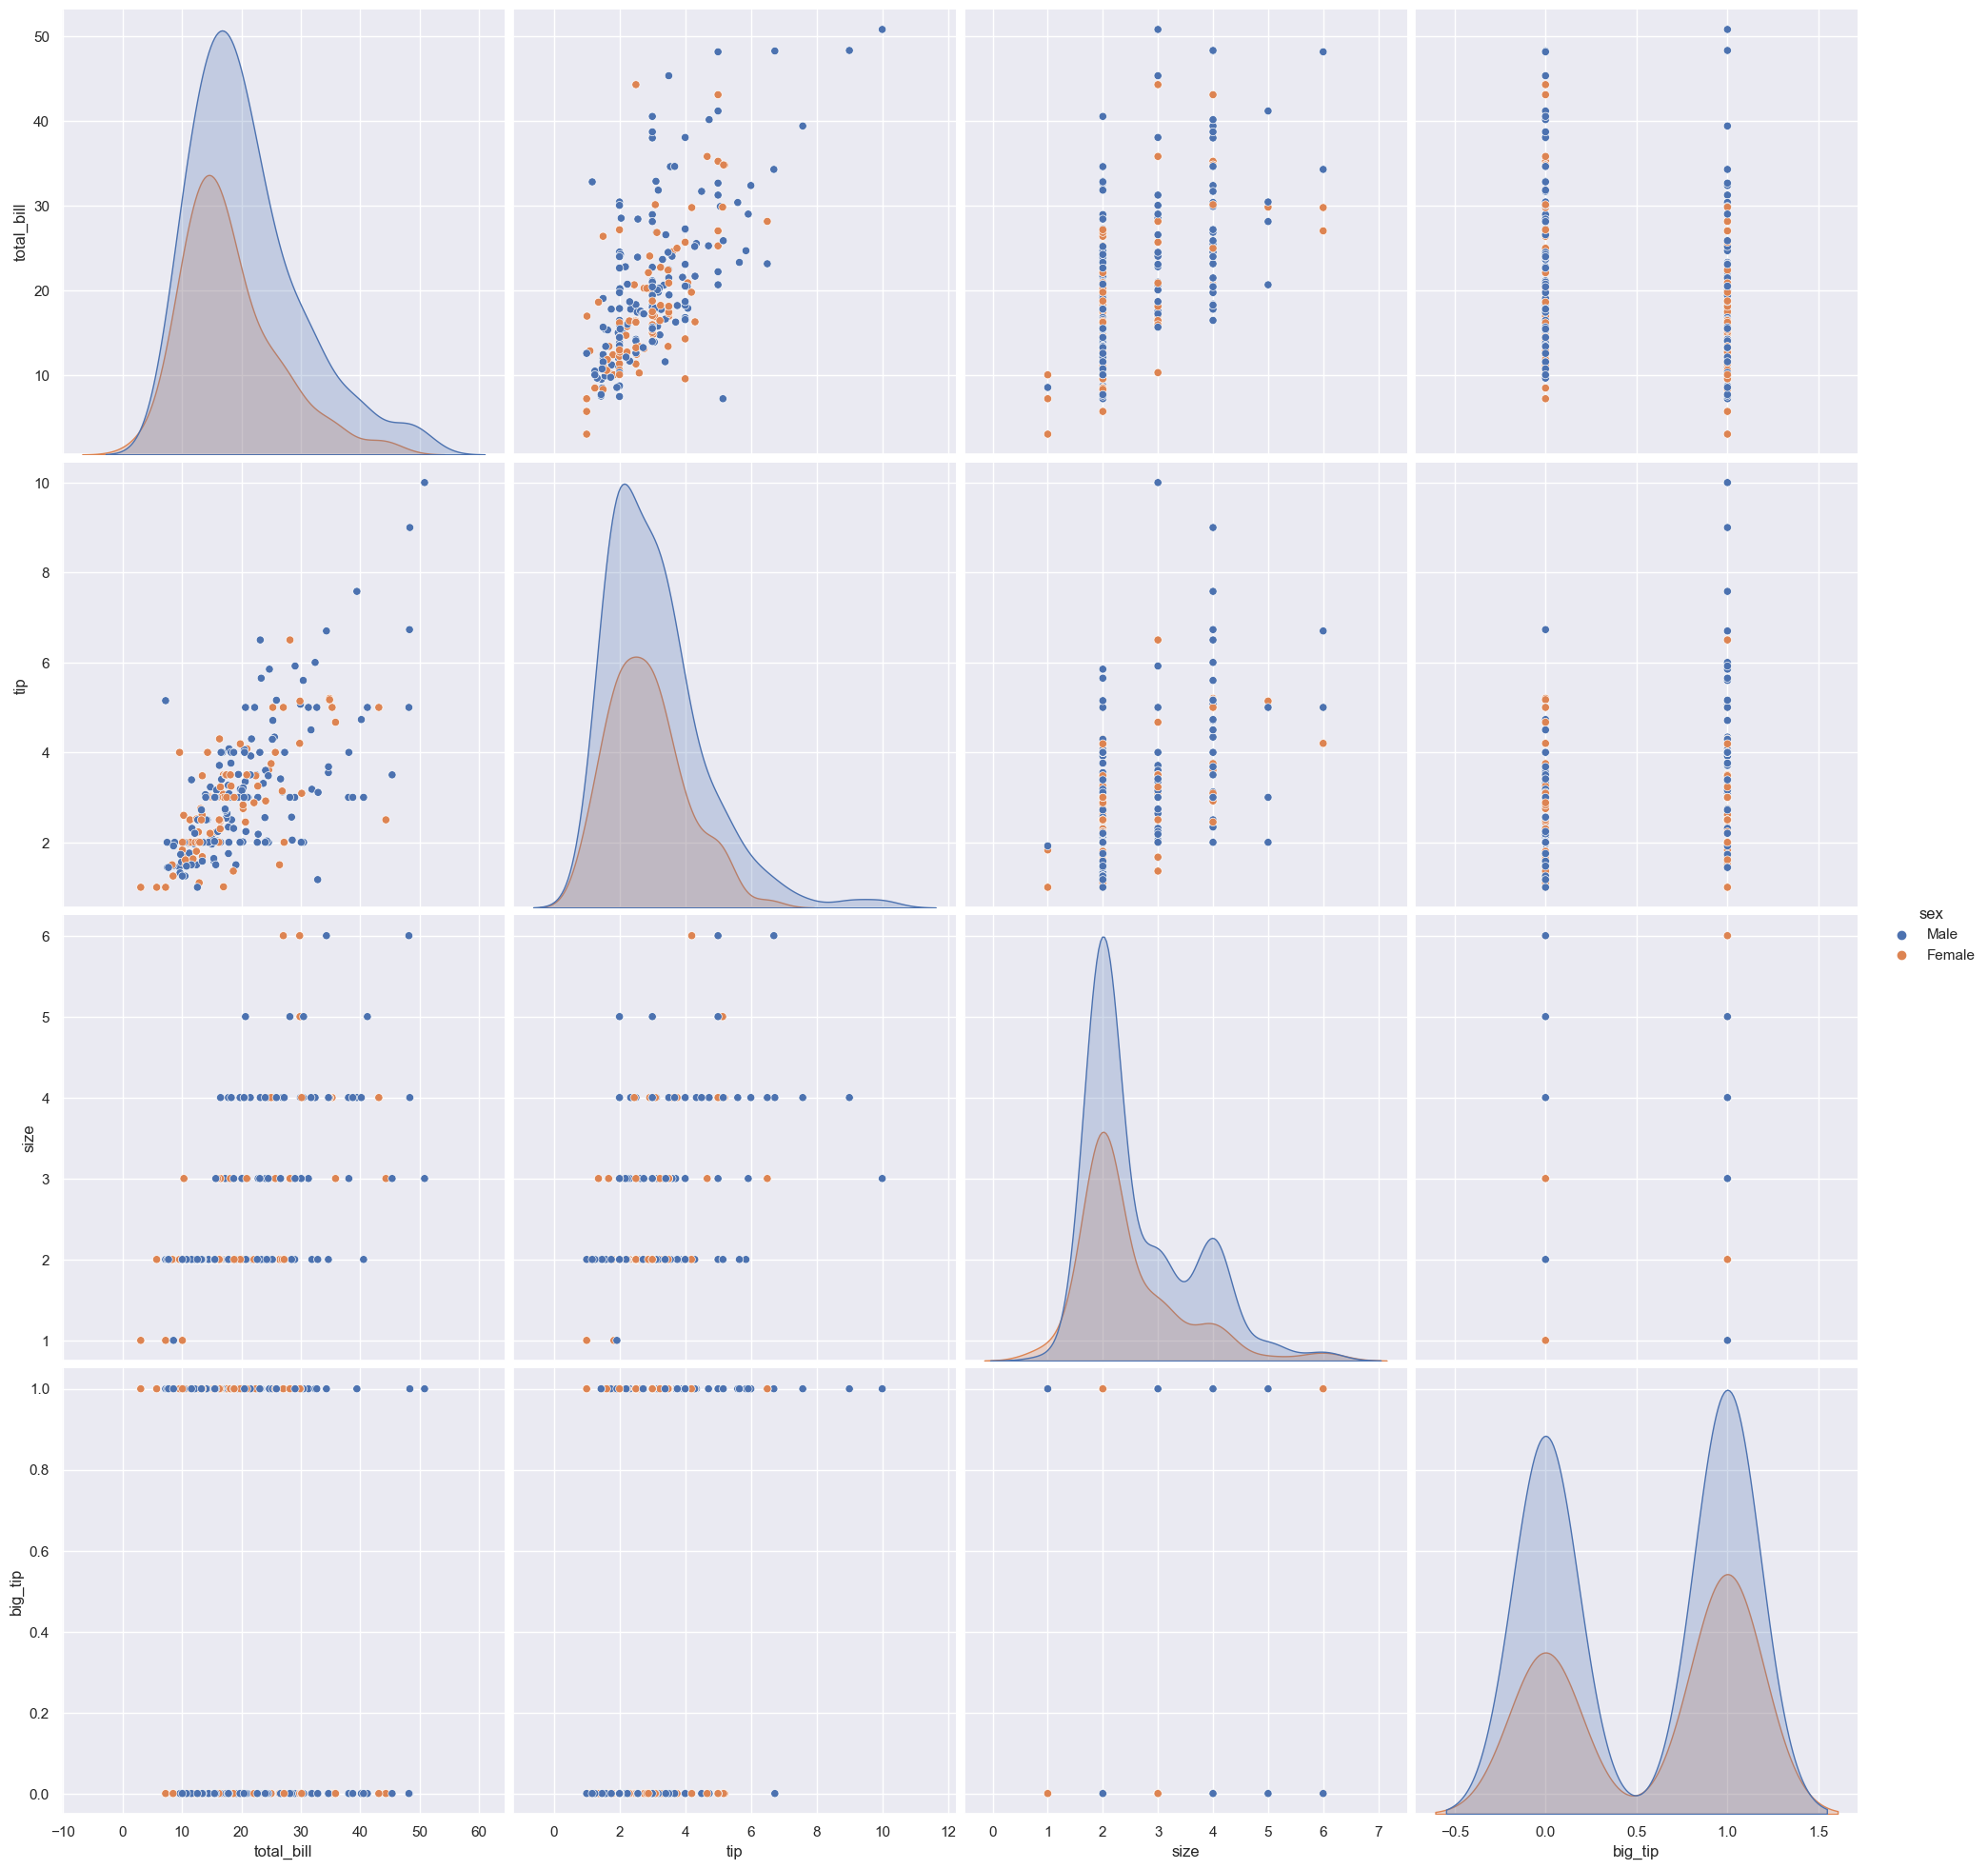

In [70]:
sns.pairplot(tips, hue='sex', height=5);

## 12.6 Matrix Plots <a id="12.6-matrix-plots"/>

When performing data analysis, in some cases it is beneficial to visualize the data as color-encoded matrices that can be used to find patterns within the data.  

### Heat Maps

The function `heatmap()` in Seaborn adds colors to the elements in a matrix, and attaches a colorbar to the plot.

Let's visualize a matrix with random values. 

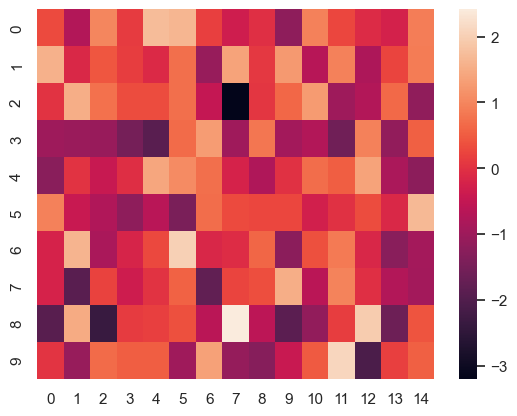

In [71]:
sns.set_theme()
data = np.random.randn(10,15)
sns.heatmap(data);

Or, if you recall from the previous lecture, we can use the `.corr()` method in pandas to calculate the correlation between the features, and afterward we can use `heatmap` to visualize the correlations. 

In [72]:
# Finding the correlation of features in titanic dataset
correlation = titanic.corr()
correlation

C:\Users\vakanski\AppData\Local\Temp\ipykernel_3264\971058138.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = titanic.corr()


survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000

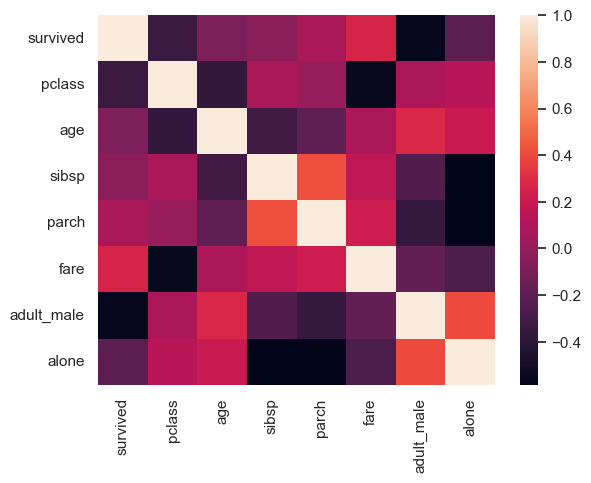

In [73]:
sns.heatmap(correlation);

If we want to add the values to the heat map, we can set the parameter `annot` to True.

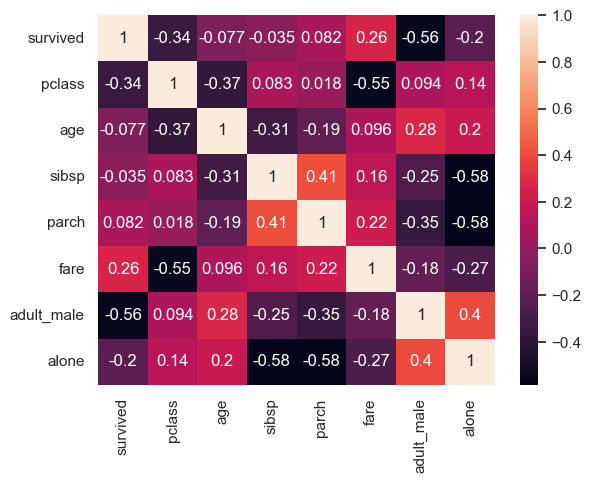

In [74]:
sns.heatmap(correlation, annot=True);

### Cluster Maps

The function `clustermap()` plots the clustered heatmap. 

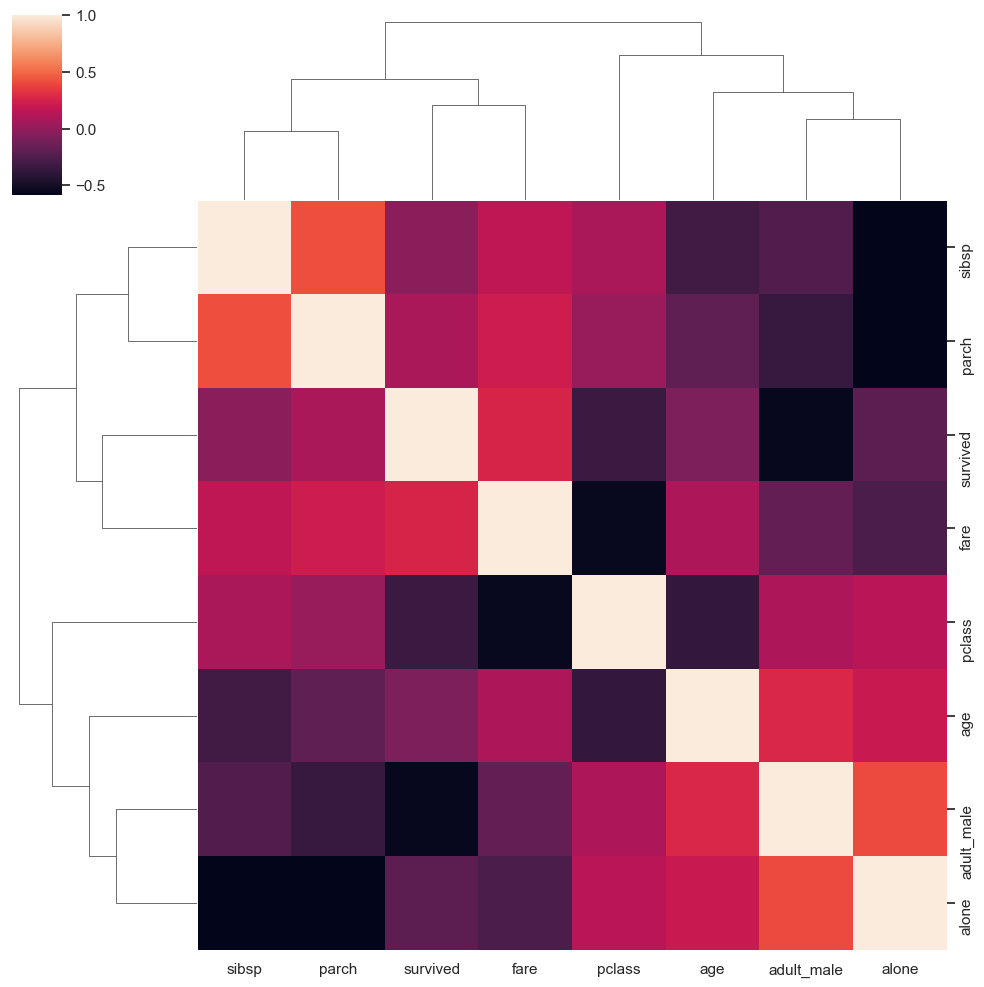

In [75]:
sns.clustermap(correlation);

## 12.7 Styles, Themes, and Colors <a id="12.7-styles,-themes,-and-colors"/>

Seaborn allows to customize the visualizations depending on our needs, and provides ways to control the plot styles, themes, and colors in our plots.

### Styles and Themes

There are five styles in Seaborn: 

- `darkgrid` (default) provides a dark background with grid lines
- `whitegrid` provides a white background with grid lines
- `dark` provides a dark background without grid lines
- `white` provides a white background without grid lines
- `ticks` provides a light gray background with tick marks on the axes

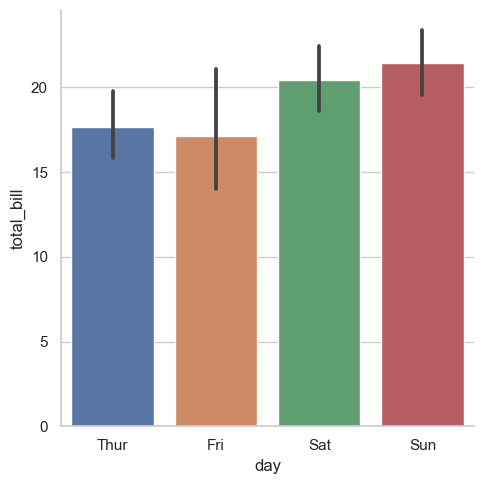

In [76]:
sns.set_style('whitegrid')
sns.catplot(data=tips, x='day', y='total_bill', kind='bar');

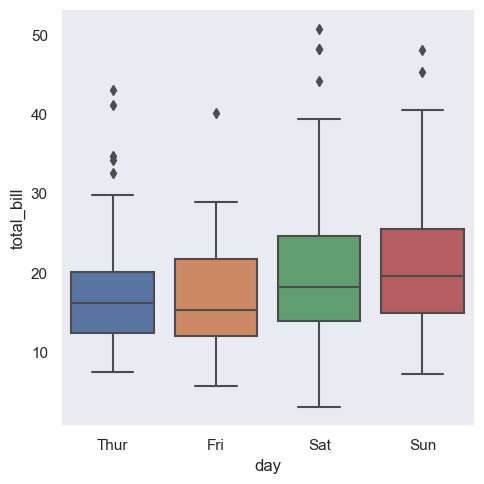

In [77]:
sns.set_style('dark')
sns.catplot(data=tips, x='day', y='total_bill', kind='box');

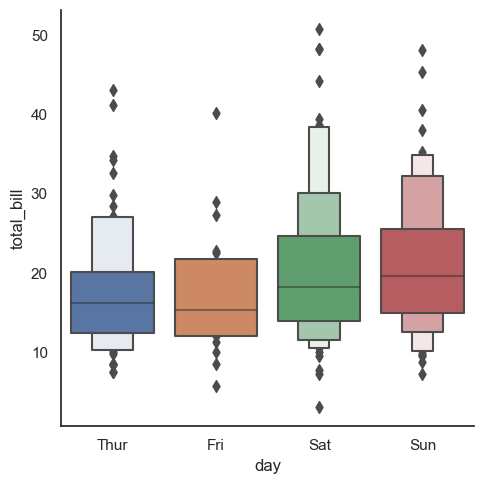

In [78]:
sns.set_style('white')
sns.catplot(data=tips, x='day', y='total_bill', kind='boxen');

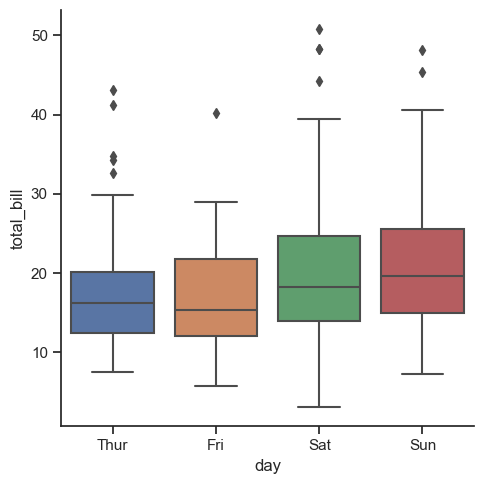

In [79]:
sns.set_style('ticks')
sns.catplot(data=tips, x='day', y='total_bill', kind='box');

#### Removing the Axes Spines

We can use the function `despine()` to remove the axes spines (borders) in the plots, or to show the spines by setting them to False.

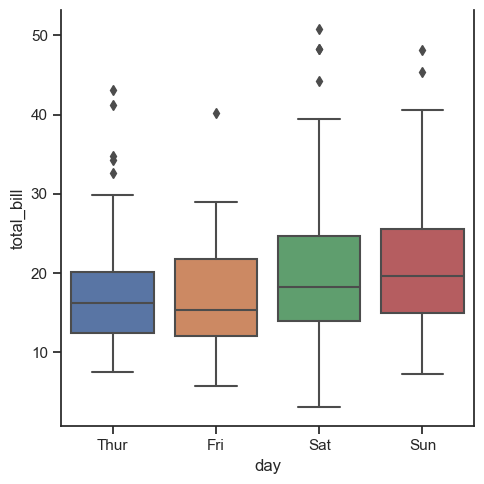

In [80]:
sns.catplot(data=tips, x='day', y='total_bill', kind='box')
sns.despine(right=False);

We can also move the spines away from the data by setting the `offset` distance that spines should move away from the axes.

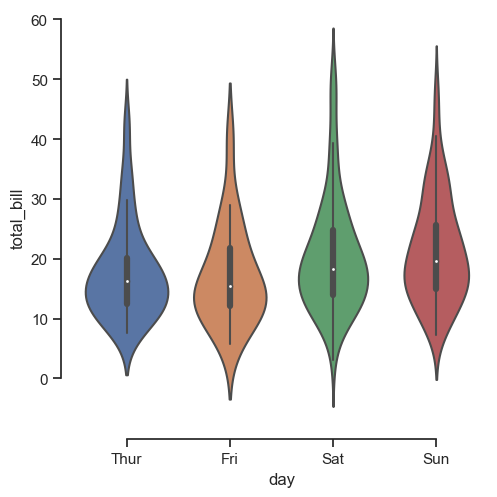

In [81]:
sns.catplot(data=tips, x='day', y='total_bill', kind='violin')
sns.despine(offset=10, trim=True);

#### Scaling Plot Elements with Context

Context is used to control the scale of the elements of the plot. This can be helpful depending on where you want to use the visualizations. 

We use `sns.set_context()` to select four contexts: `paper`, `notebook` (default), `talk`, and `poster`.

We also have to reset the theme first.

In [82]:
sns.set_theme()

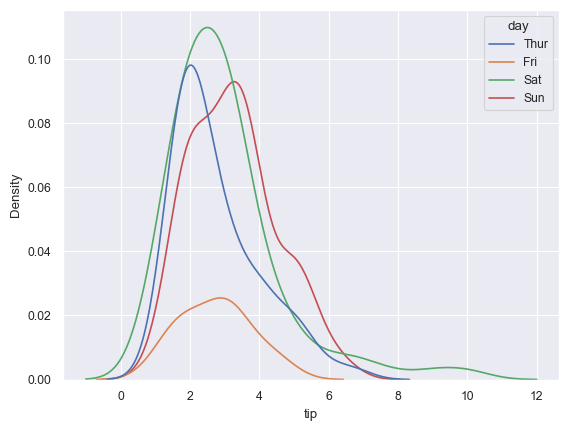

In [83]:
sns.set_context('paper')
sns.kdeplot(data=tips, x='tip', hue='day');

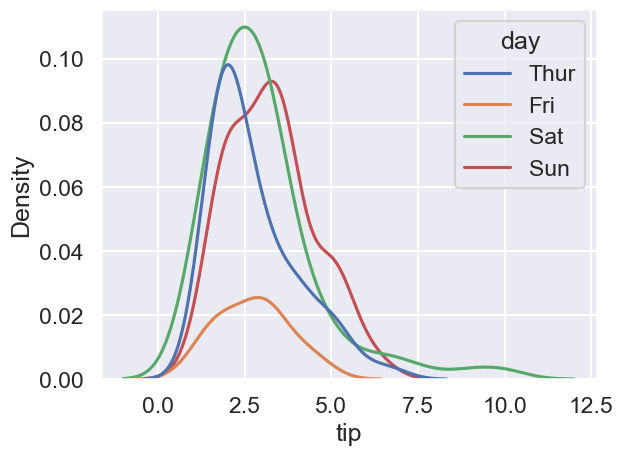

In [84]:
sns.set_context('talk')
sns.kdeplot(data=tips, x='tip', hue='day');

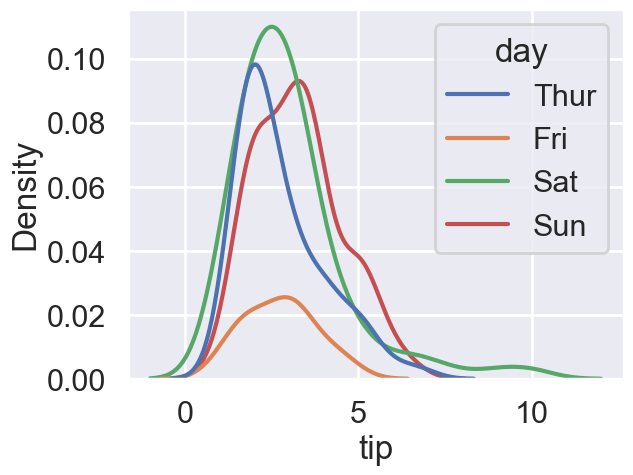

In [85]:
sns.set_context('poster')
sns.kdeplot(data=tips, x='tip', hue='day');

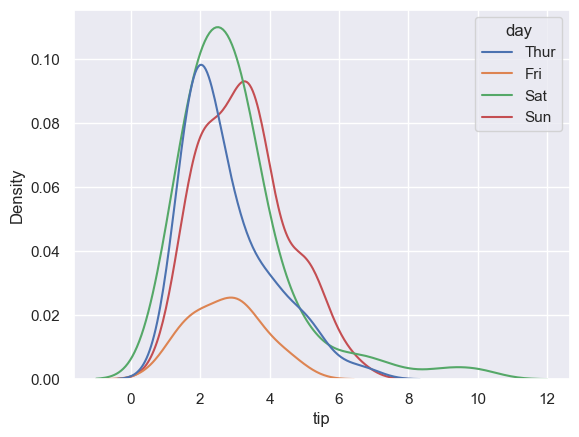

In [86]:
sns.set_context('notebook')
sns.kdeplot(data=tips, x='tip', hue='day');

### Colors

Seaborn allows us to choose colors for the plot visualizations by selecting from a wide range of color palettes. 

We can either use `sns.color_palette()` before each plot, or set `palette` inside the plot definition.

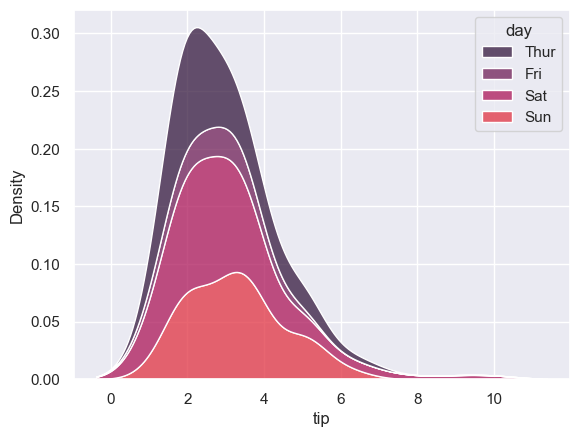

In [87]:
sns.set_palette('rocket')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

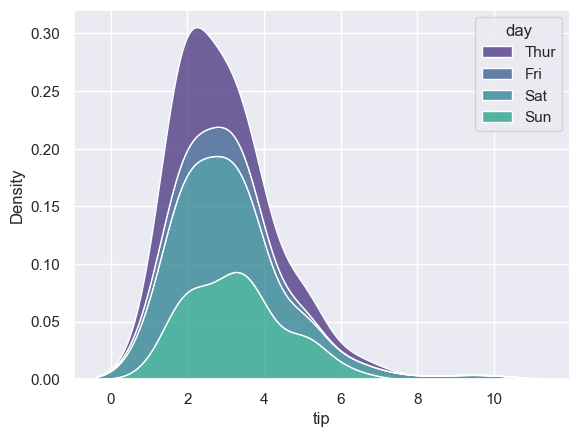

In [88]:
sns.set_palette('viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

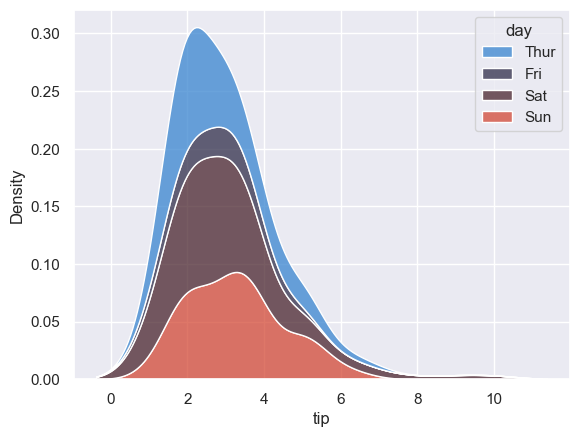

In [89]:
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack', palette='icefire');

To see the available color palettes, check out the Seaborn [documentation](https://seaborn.pydata.org/tutorial/color_palettes.html). 

In [90]:
# Check the palettes

sns.color_palette('tab10')

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [91]:
sns.color_palette('dark')

[(0.0, 0.10980392156862745, 0.4980392156862745),
 (0.6941176470588235, 0.25098039215686274, 0.050980392156862744),
 (0.07058823529411765, 0.44313725490196076, 0.10980392156862745),
 (0.5490196078431373, 0.03137254901960784, 0.0),
 (0.34901960784313724, 0.11764705882352941, 0.44313725490196076),
 (0.34901960784313724, 0.1843137254901961, 0.050980392156862744),
 (0.6352941176470588, 0.20784313725490197, 0.5098039215686274),
 (0.23529411764705882, 0.23529411764705882, 0.23529411764705882),
 (0.7215686274509804, 0.5215686274509804, 0.0392156862745098),
 (0.0, 0.38823529411764707, 0.4549019607843137)]

Also, we can use `sns.set_theme()` to directly set the style, palette, and context.

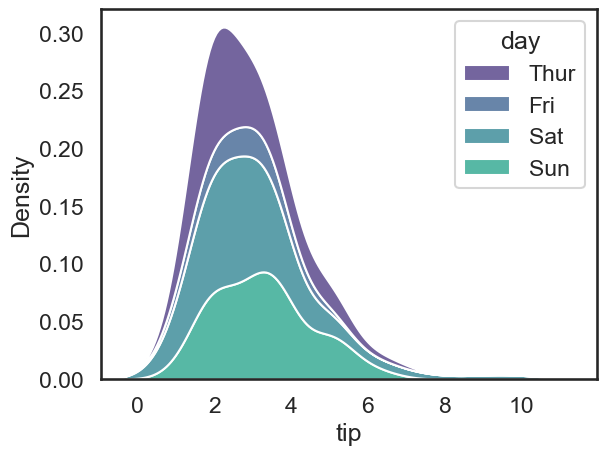

In [92]:
sns.set_theme(style='white', context='talk', palette='viridis')
sns.kdeplot(data=tips, x='tip', hue='day', multiple='stack');

## References <a id="references"/>

1. Complete Machine Learning Package, Jean de Dieu Nyandwi, available at: [https://github.com/Nyandwi/machine_learning_complete](https://github.com/Nyandwi/machine_learning_complete).

[BACK TO TOP](#top)